In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 0

### Import modules and utilities

In [ ]:
import json
import pandas as pd
import pprint
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
# !pip install -Iv seaborn==0.11.0
import seaborn as sns
print(sns.__version__)
sns.set_style()
from scipy.stats import pearsonr
from scipy.stats import iqr

%cd '/content/drive/My Drive/Colab Notebooks/media-agenda'
%pwd 

import util
from util import DocType, Source, OptimalKClustersConfig
import senti_util
from termcolor import colored, cprint

%cd '/content/drive/My Drive/Colab Notebooks/media-agenda/plot'
%pwd 

0.11.0
/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/plot


'/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/plot'

### Import dictionary of sentence cluster and sentiment assignments

Filter out unnecessary the assignment records
1. Records from garbage clusters
2. Records not falls between 2009 and 2017

In [ ]:
start_year = 2009
end_year = 2017
start_datetime, end_datetime, start_datetime_str, end_datetime_str = util.get_start_end_datetime(start_year, end_year)
# df = senti_util.get_sentence_cluster_sentiment_df(start_year = start_year, end_year = end_year, 
#                                                   path = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/sentence_cluster_sentiment_dict.json', verbose = True)

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/media-agenda/data/df_2009_to_2017_with_time_interval_indexing.csv')

df.head()

,Unnamed: 0,sentence_id,source,article_id,comment_id,posting_time,cluster,sentiw_sentiment,textblob_polarity,textblob_subjectivity,is_comment,date,month,year,bin_of_every_2_days,bin_of_every_3_days,bin_of_every_4_days,bin_of_every_5_days,bin_of_every_6_days,bin_of_every_7_days,bin_of_every_14_days,bin_of_every_28_days,bin_of_every_56_days
0,0,12739,nytimes,101,-1,2009-01-11 00:00:00,1,-0.250000,-0.066667,0.600000,False,2009-01-11,1,2009,5,3,2,2,1,1,0,0,0
1,1,12721,nytimes,101,-1,2009-01-11 00:00:00,1,0.000000,0.083333,0.500000,False,2009-01-11,1,2009,5,3,2,2,1,1,0,0,0
2,2,12722,nytimes,101,-1,2009-01-11 00:00:00,6,0.166667,-0.066667,0.533333,False,2009-01-11,1,2009,5,3,2,2,1,1,0,0,0
3,3,12726,nytimes,101,-1,2009-01-11 00:00:00,3,-0.041667,-0.133333,0.450000,False,2009-01-11,1,2009,5,3,2,2,1,1,0,0,0
4,4,12727,nytimes,101,-1,2009-01-11 00:00:00,6,0.375000,0.250000,0.300000,False,2009-01-11,1,2009,5,3,2,2,1,1,0,0,0


## PART 1: Sentiment distribution between 2009 and 2017

### Textblob vs SentiWordNet

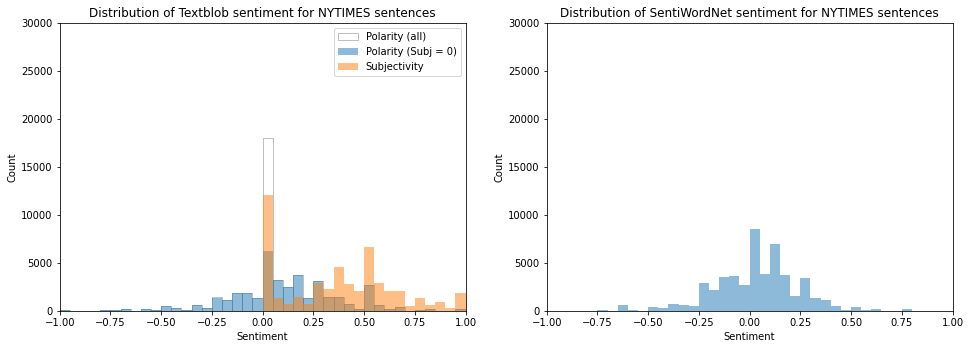

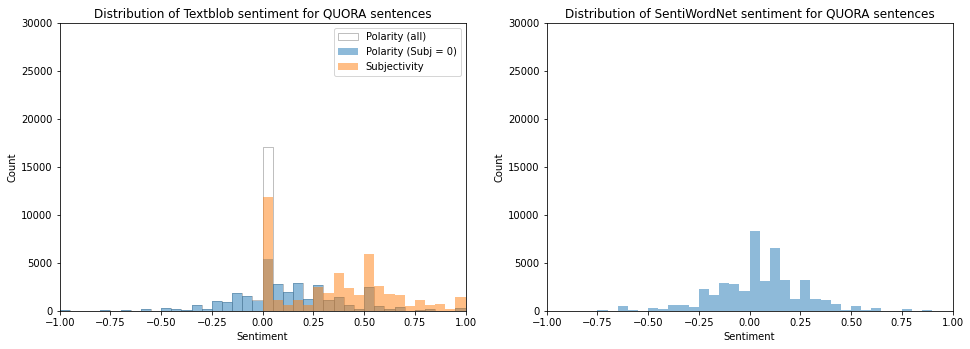

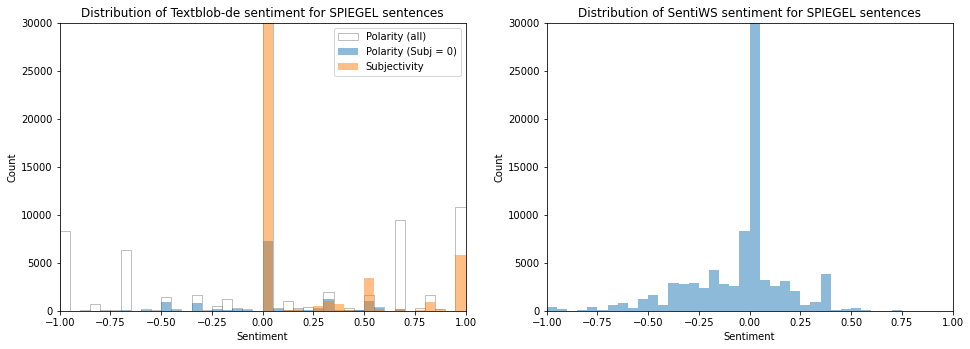

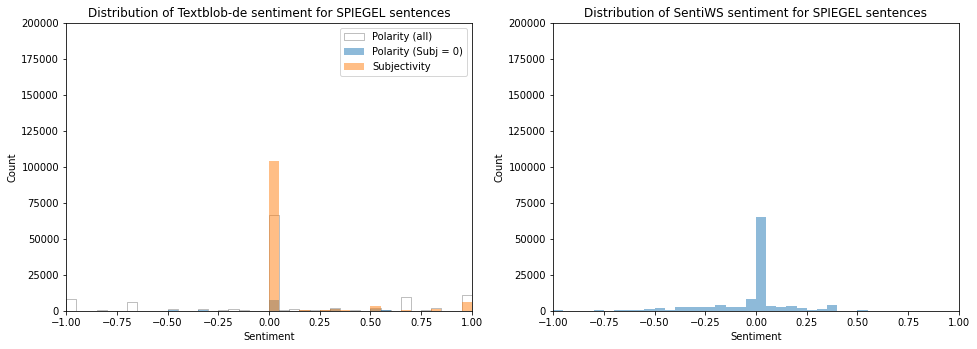

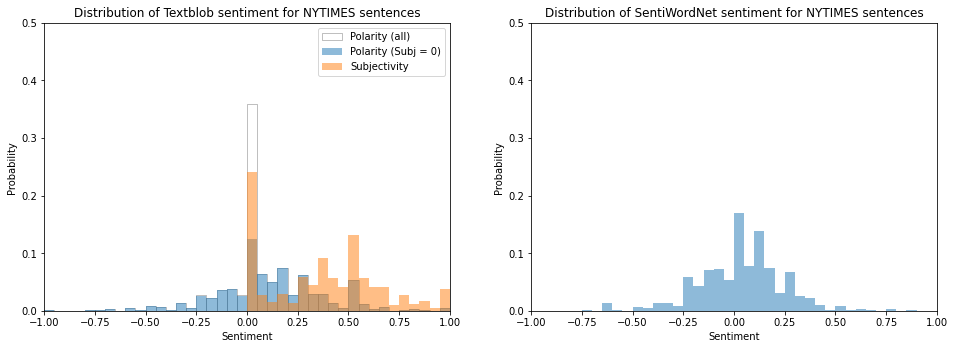

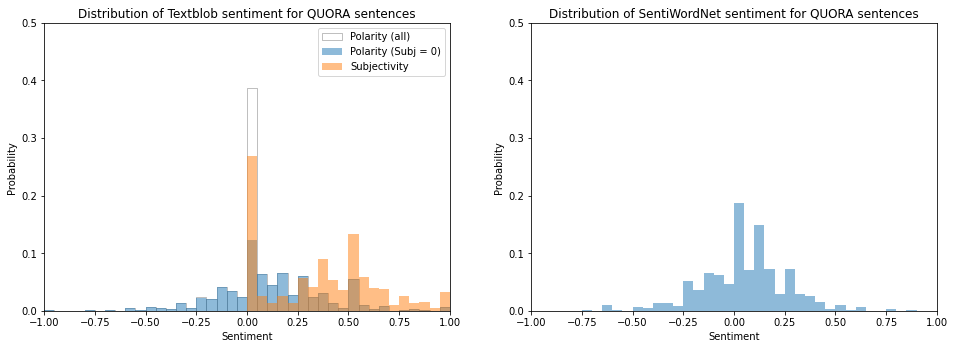

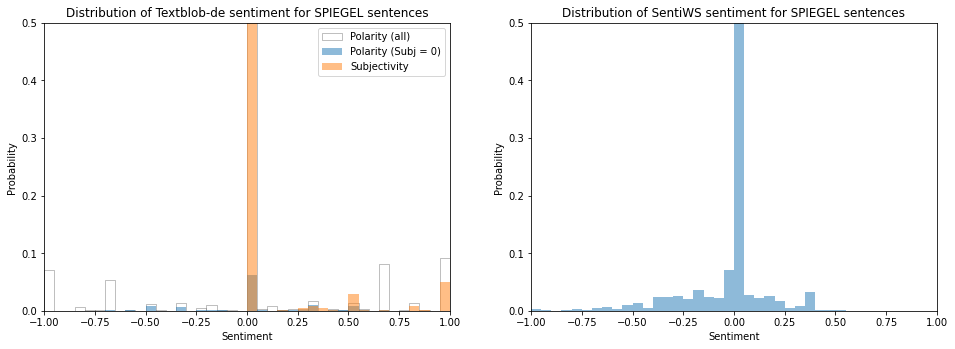

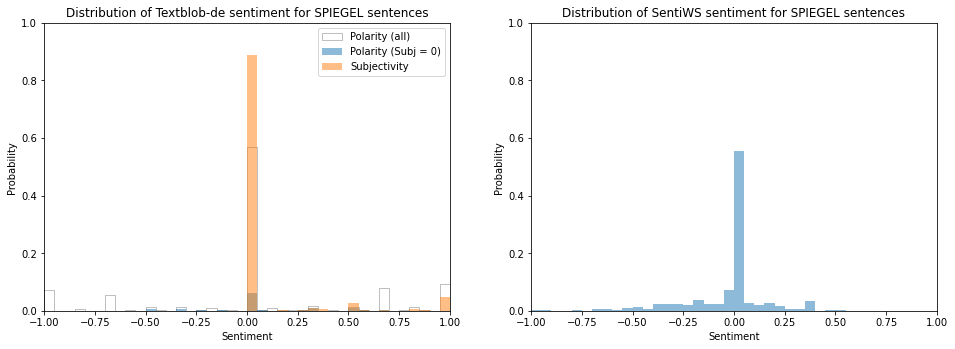

In [ ]:
def plot(source = Source, ylim = (0, 1), fname = None, is_in_probability = False):
  if source == Source.SPIEGEL:
    textblob = 'Textblob-de'
    senti = 'SentiWS'
  else:
    textblob = 'Textblob'
    senti = 'SentiWordNet'

  fig = plt.figure(figsize=(16, 8))

  ax = plt.subplot(121)

  if is_in_probability == True:
    plt.hist(df[(df.source == source)].textblob_polarity, color = 'white', alpha = 0.5, bins = 40, range = (-1, 1), label = 'Polarity (all)', edgecolor = 'black', linewidth = 0.5,
             weights = util.get_plot_weights(df[(df.source == source)].textblob_polarity))
    plt.hist(df[(df.source == source) & (df.textblob_subjectivity != 0)].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Polarity (Subj = 0)',
             weights = np.ones_like(df[(df.source == source) & (df.textblob_subjectivity != 0)].textblob_polarity) / len(df[(df.source == source)].textblob_polarity))
    plt.hist(df[df.source == source].textblob_subjectivity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Subjectivity',
             weights = util.get_plot_weights(df[df.source == source].textblob_subjectivity))
    plt.ylabel('Probability')
  else:
    plt.hist(df[(df.source == source)].textblob_polarity, color = 'white', alpha = 0.5, bins = 40, range = (-1, 1), label = 'Polarity (all)', edgecolor = 'black', linewidth = 0.5)
    plt.hist(df[(df.source == source) & (df.textblob_subjectivity != 0)].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Polarity (Subj = 0)')
    plt.hist(df[df.source == source].textblob_subjectivity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Subjectivity')
    plt.ylabel('Count')
  plt.xlim(-1, 1)
  plt.ylim(ylim)
  plt.title('Distribution of {} sentiment for {} sentences'.format(textblob, str.upper(source)))
  plt.xlabel('Sentiment')
  plt.legend()

  plt.subplot(122)

  if is_in_probability == True:
    plt.hist(df[df.source == source].sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1),
             weights = util.get_plot_weights(df[df.source == source].sentiw_sentiment))
    plt.ylabel('Probability')
  else:
    plt.hist(df[df.source == source].sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1))
    plt.ylabel('Count')
  plt.xlim(-1, 1)
  plt.ylim(ylim)
  plt.title('Distribution of {} sentiment for {} sentences'.format(senti, str.upper(source)))
  plt.xlabel('Sentiment')
  
  plt.subplots_adjust(bottom=0.25, top=0.75)
  plt.show()
  if fname != None:
    fig.savefig(fname, format = 'pdf')

plot(Source.NYTIMES, ylim = (0, 30000), fname = 'sentiment_dist_nytimes_2009_2017_sm.pdf')
plot(Source.QUORA, ylim = (0, 30000), fname = 'sentiment_dist_quora_2009_2017_sm.pdf')
plot(Source.SPIEGEL, ylim = (0, 30000), fname = 'sentiment_dist_spiegel_2009_2017_sm.pdf')
plot(Source.SPIEGEL, ylim = (0, 200000), fname = 'sentiment_dist_spiegel_2009_2017_lg.pdf')

plot(Source.NYTIMES, ylim = (0, 0.5), is_in_probability = True)
plot(Source.QUORA, ylim = (0, 0.5), is_in_probability = True)
plot(Source.SPIEGEL, ylim = (0, 0.5), is_in_probability = True)
plot(Source.SPIEGEL, ylim = (0, 1), is_in_probability = True)

### Distribution of sentiment (Globally)
* each sentence as a unit





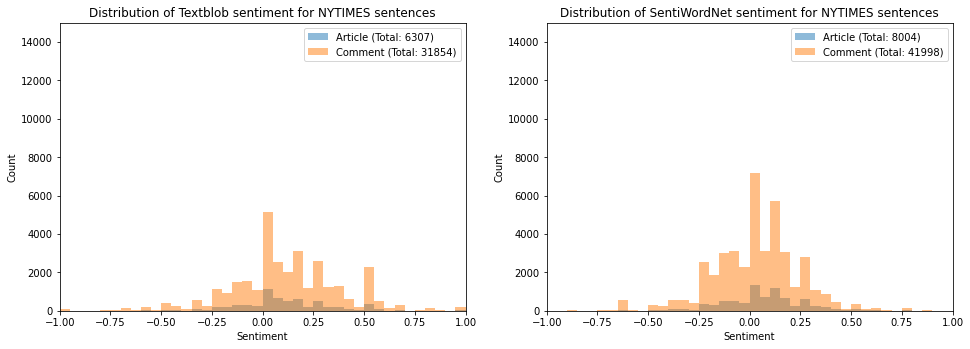

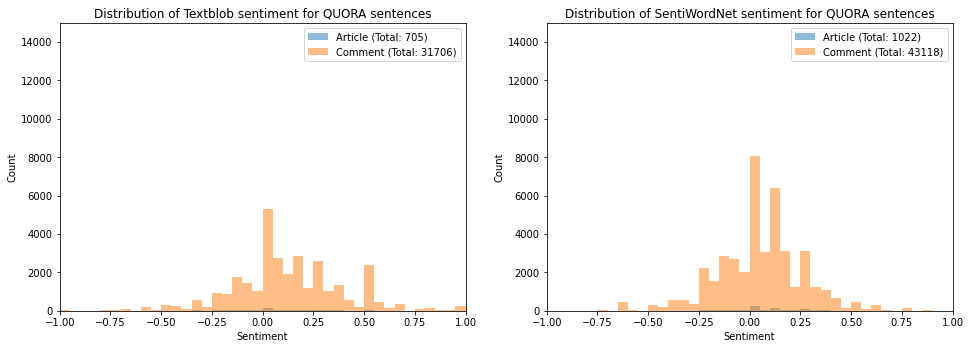

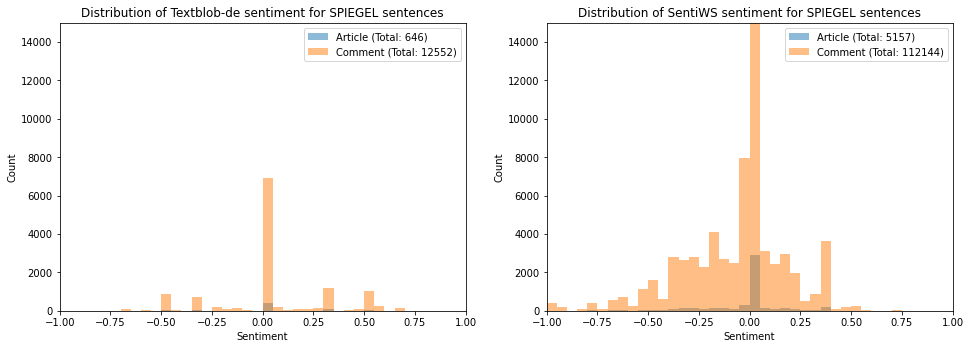

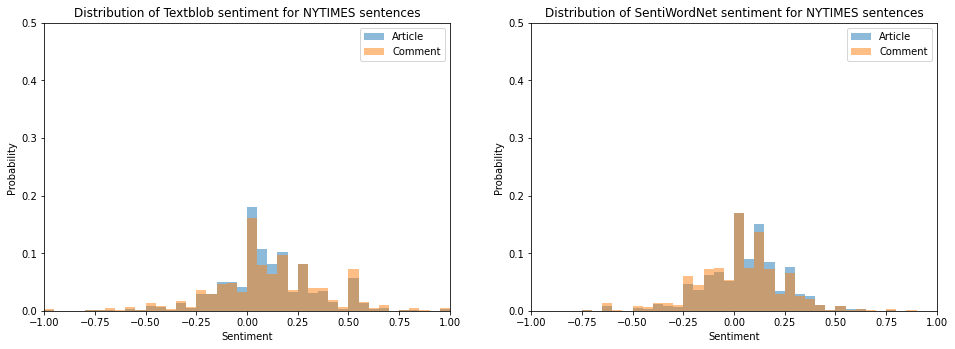

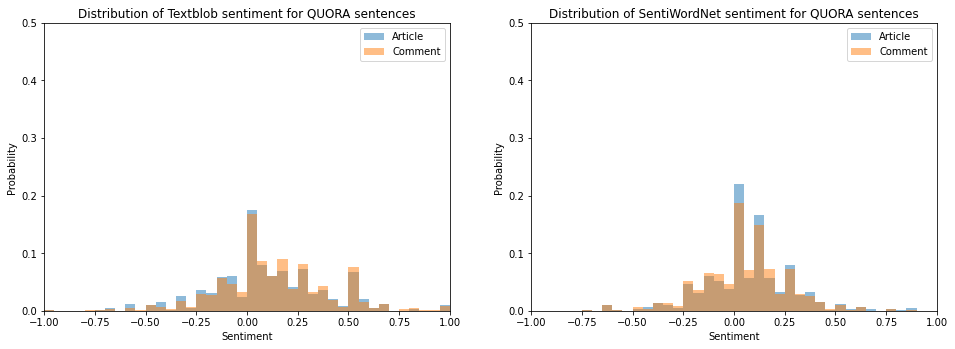

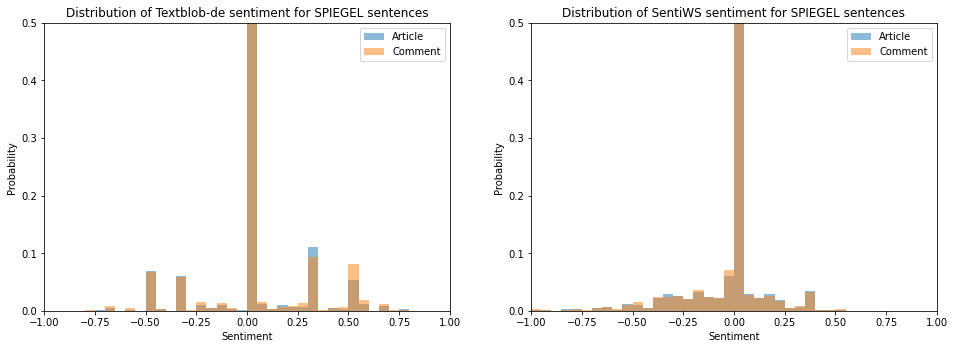

In [ ]:
def plot(source = Source, ylim = (0, 1), fname = None, is_in_probability = True):
  if source == Source.SPIEGEL:
    textblob = 'Textblob-de'
    senti = 'SentiWS'
  else:
    textblob = 'Textblob'
    senti = 'SentiWordNet'

  sub_article = df[(df.source == source) & (df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = df[(df.source ==  source) & (df.comment_id != DocType.NON_COMMENT.value)]

  fig = plt.figure(figsize=(16, 8))

  ax = plt.subplot(121)

  if is_in_probability == True:
    plt.hist(sub_article[sub_article.textblob_subjectivity != 0].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Article',
             weights = util.get_plot_weights(sub_article[sub_article.textblob_subjectivity != 0].textblob_polarity))
    plt.hist(sub_comment[sub_comment.textblob_subjectivity != 0].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Comment',
             weights = util.get_plot_weights(sub_comment[sub_comment.textblob_subjectivity != 0].textblob_polarity))
    plt.ylabel('Probability')
  else: 
    plt.hist(sub_article[sub_article.textblob_subjectivity != 0].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Article' + ' (Total: ' + str(sub_article[sub_article.textblob_subjectivity != 0].shape[0]) + ')')
    plt.hist(sub_comment[sub_comment.textblob_subjectivity != 0].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Comment' + ' (Total: ' + str(sub_comment[sub_comment.textblob_subjectivity != 0].shape[0]) + ')')
    plt.ylabel('Count')
  plt.xlim(-1, 1)
  plt.ylim(ylim)
  plt.title('Distribution of {} sentiment for {} sentences'.format(textblob, str.upper(source)))
  plt.xlabel('Sentiment')
  plt.legend()

  plt.subplot(122)

  if is_in_probability == True:
    plt.hist(sub_article.sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Article',
             weights = util.get_plot_weights(sub_article.sentiw_sentiment))
    plt.hist(sub_comment.sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Comment', 
             weights = util.get_plot_weights(sub_comment.sentiw_sentiment))
    plt.ylabel('Probability')
  else:
    plt.hist(sub_article.sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Article' + ' (Total: ' + str(sub_article.shape[0]) + ')')
    plt.hist(sub_comment.sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Comment' + ' (Total: ' + str(sub_comment.shape[0]) + ')')
    plt.ylabel('Count')
  plt.xlim(-1, 1)
  plt.ylim(ylim)
  plt.title('Distribution of {} sentiment for {} sentences'.format(senti, str.upper(source)))
  plt.xlabel('Sentiment')
  plt.legend()

  plt.subplots_adjust(bottom=0.25, top=0.75)
  plt.show()
  if fname != None:
    fig.savefig(fname, format = 'pdf')

plot(source = Source.NYTIMES, ylim = (0, 15000), is_in_probability = False)
plot(source = Source.QUORA, ylim = (0, 15000), is_in_probability = False)
plot(source = Source.SPIEGEL, ylim = (0, 15000), is_in_probability = False)  
plot(source = Source.NYTIMES, ylim = (0, 0.5))
plot(source = Source.QUORA, ylim = (0, 0.5))
plot(source = Source.SPIEGEL, ylim = (0, 0.5))

### TODO: Distribution of sentiment (By topic)
* each sentence as a unit





In [ ]:
  if by_cluster:
    
    for i in range(OptimalKClustersConfig.k_with_garbage):
      print(i)
      if i not in OptimalKClustersConfig.garbage_clusters:
        clustered_article = sub_article[sub_article.cluster == i]
        clustered_comment = sub_comment[sub_comment.cluster == i]

        print(clustered_article.shape)
        
        plot_histogram(clustered_article, clustered_comment, is_in_probability, 'Sentiment distribution for ' + str.upper(source) + ' (sentence-wise) on \'' + OptimalKClustersConfig.clusters_with_garbage[i] + '\'')


### Overall boxplot

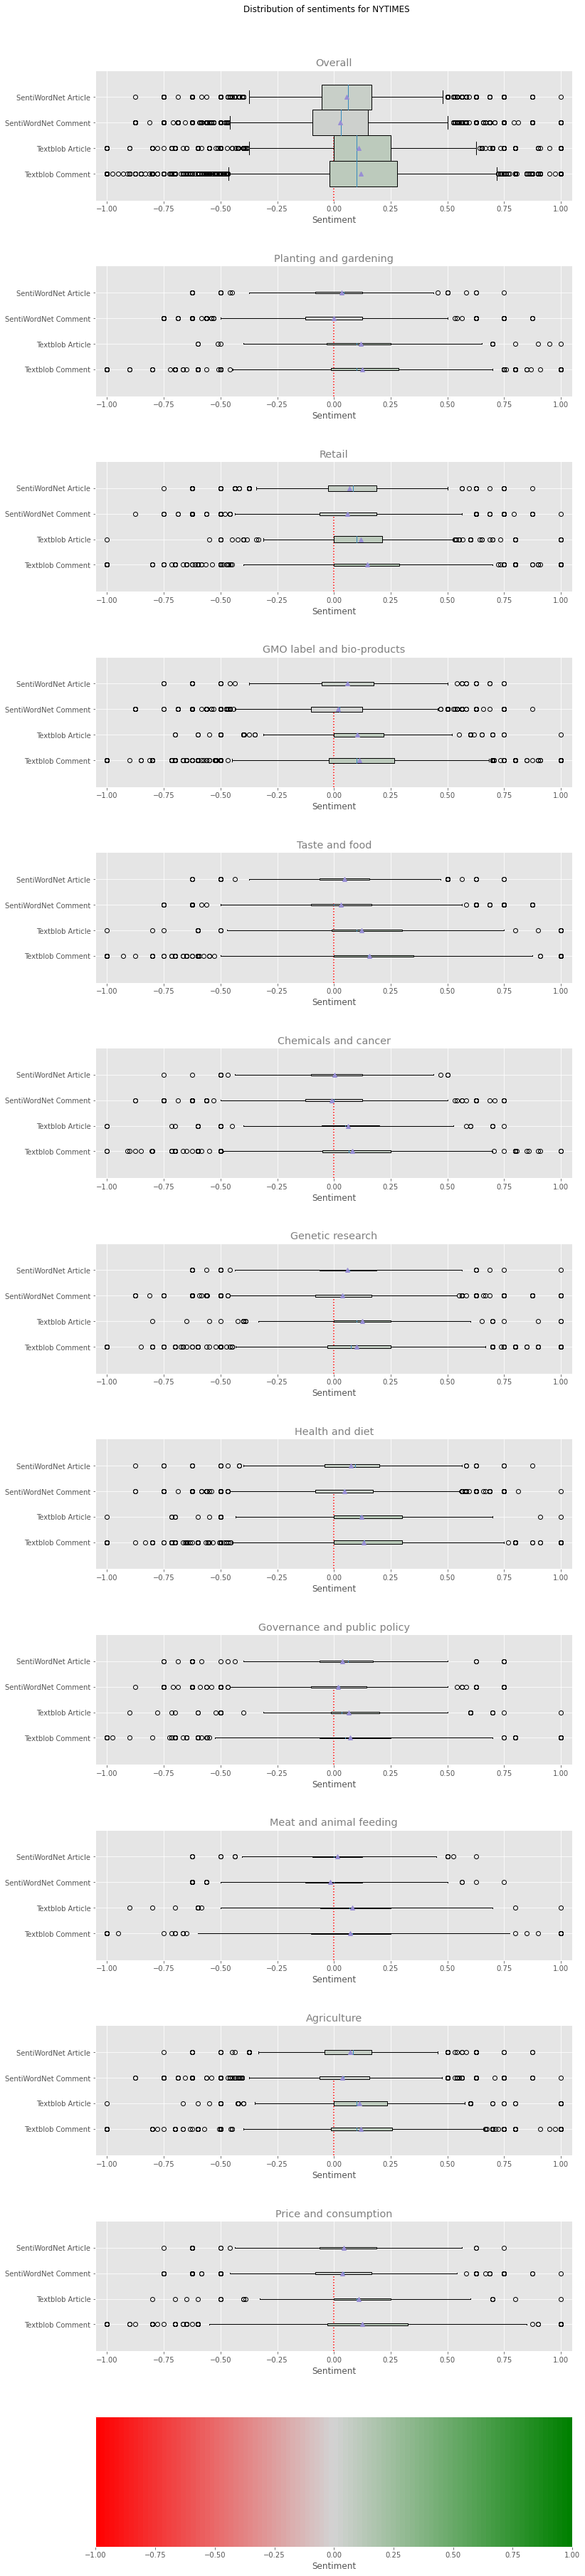

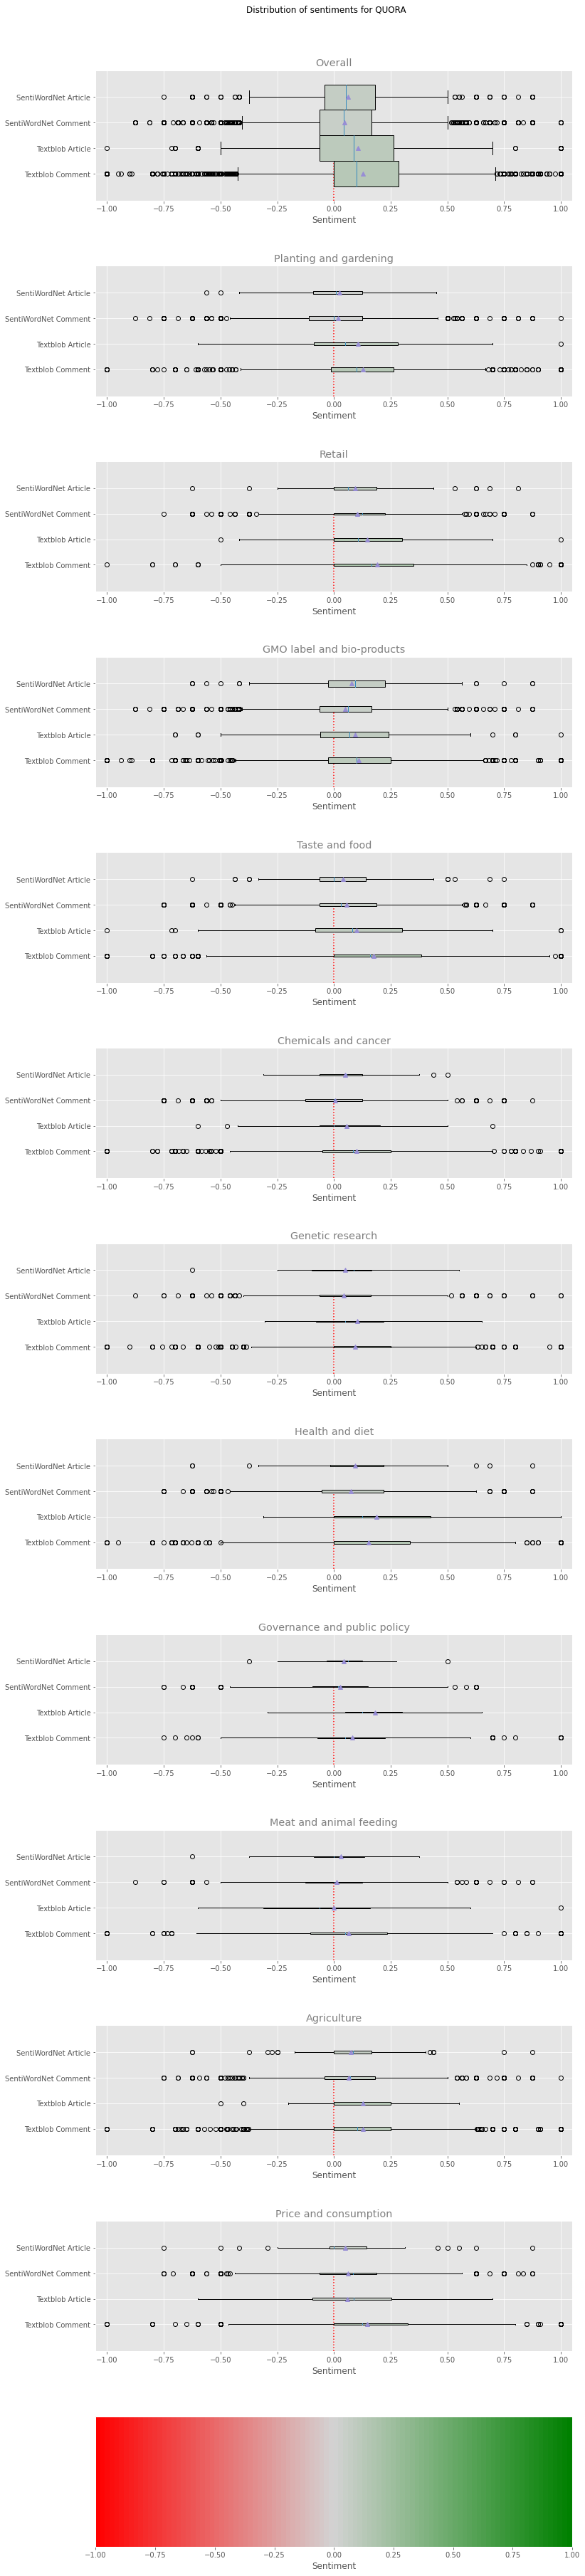

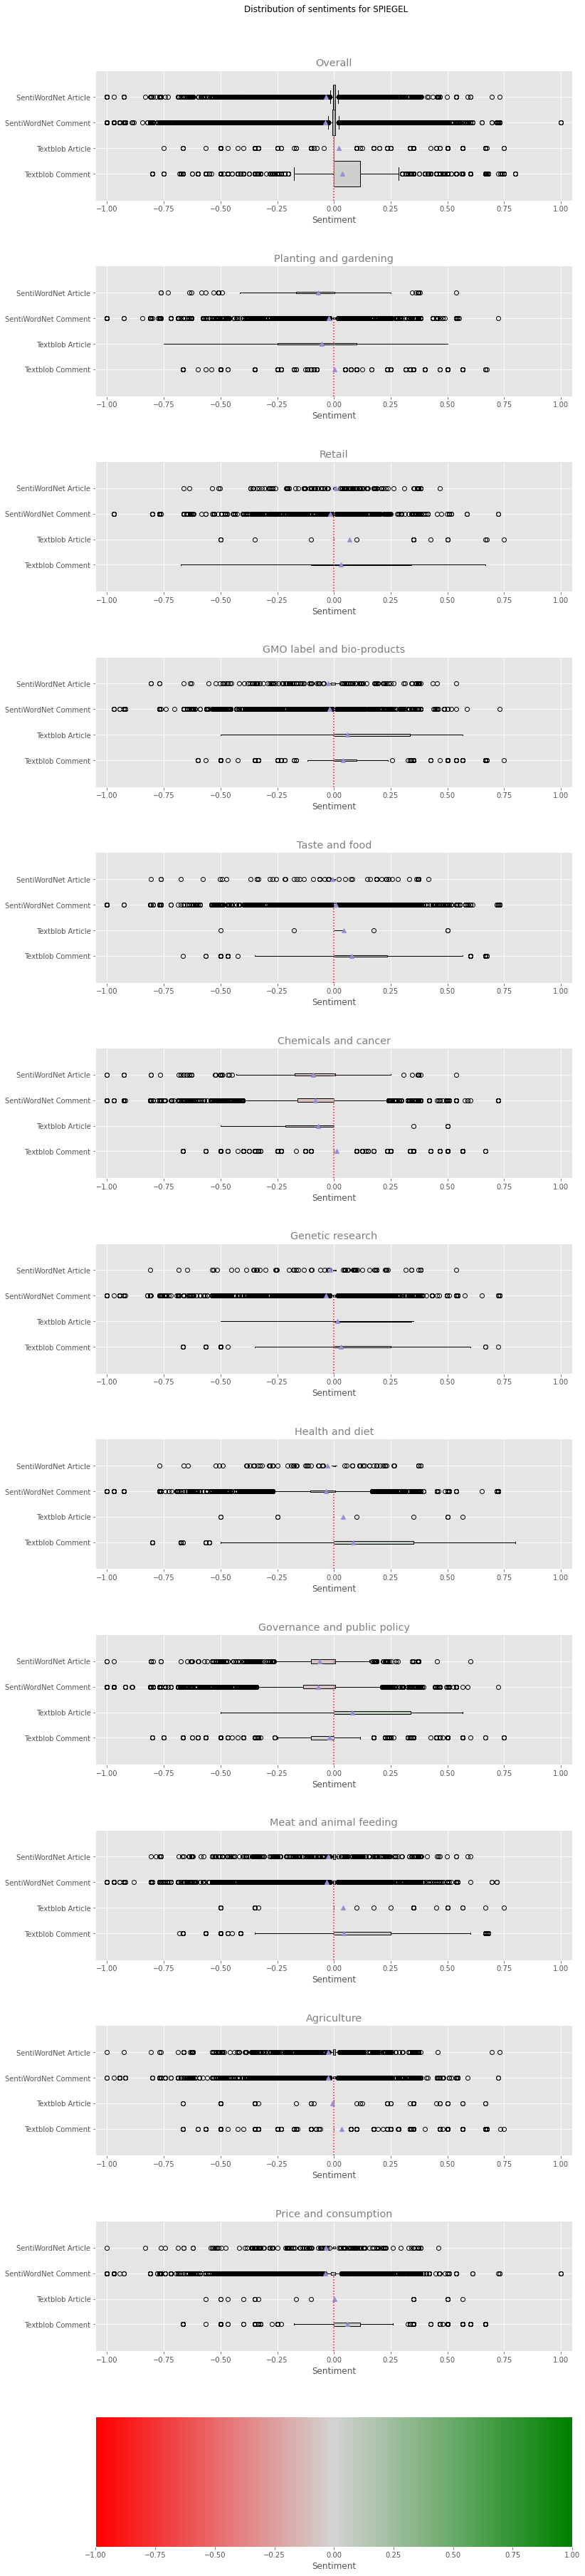

In [ ]:
# def plot(source = Source, magnified = True, is_textblob = False):
def plot(source = Source, magnified = True):
  
  # if source == Source.SPIEGEL:
  #   senti_choice = 'Textblob-de' if is_textblob else 'SentiWS'
  # else:
  #   senti_choice = 'Textblob' if is_textblob else 'SentiWordNet'

  sub_df = df[df.source == source]
  factor = 5 if magnified else 1
  data = []
  weights = []
  titles = ['Overall'] + OptimalKClustersConfig.clusters
  k = len(titles)
  
  def get_data_tuple(df):
    # if is_textblob:
    #   return (df[(df.is_comment == True) & (df.textblob_subjectivity != 0)].textblob_polarity,
    #         df[(df.is_comment == False) & (df.textblob_subjectivity != 0)].textblob_polarity)  
    # else:
    #   return (df[df.is_comment == True].sentiw_sentiment,
    #           df[df.is_comment == False].sentiw_sentiment)
    return (df[(df.is_comment == True) & (df.textblob_subjectivity != 0)].textblob_polarity,
            df[(df.is_comment == False) & (df.textblob_subjectivity != 0)].textblob_polarity,
            df[df.is_comment == True].sentiw_sentiment,
            df[df.is_comment == False].sentiw_sentiment)

  # data for overall
  data.append(get_data_tuple(sub_df))
  # weights.append((1 * factor, 1 * factor))
  weights.append((1 * factor, 1 * factor, 1 * factor, 1* factor))

  # data for each cluster
  for i in range(OptimalKClustersConfig.k_with_garbage):
    if i not in OptimalKClustersConfig.garbage_clusters:
      tuple = get_data_tuple(sub_df[sub_df.cluster == i])
      data.append(tuple)
      # weights.append((tuple[0].shape[0] / data[0][0].shape[0] * factor, 
      #                 tuple[1].shape[0] / data[0][1].shape[0] * factor))
      weights.append((tuple[0].shape[0] / data[0][0].shape[0] * factor, 
                      tuple[1].shape[0] / data[0][1].shape[0] * factor,
                      tuple[2].shape[0] / data[0][2].shape[0] * factor,
                      tuple[3].shape[0] / data[0][3].shape[0] * factor,))

  # colormap
  colors = ['red', 'lightgrey', 'green']
  # colors = ['red', 'white', 'green']
  cmap = LinearSegmentedColormap.from_list('sentiment', colors, N = 100)
  norm = mpl.colors.Normalize(vmin = -0.1, vmax = 0.1) if magnified else mpl.colors.Normalize(vmin = -1, vmax = 1) 

  # figure
  plt.style.use('ggplot')
  fig, axs = plt.subplots(13, 1, figsize = (12, 64), num = 'ggplot')
  # st = fig.suptitle('Distribution of ' + senti_choice + ' for ' + str.upper(source))
  st = fig.suptitle('Distribution of sentiments for ' + str.upper(source))

  for i in range(len(data)):
    box = axs[i].boxplot(data[i], widths = weights[i], vert = False, showmeans = True, patch_artist = True)
    axs[i].set_title(titles[i], color = 'grey')
    axs[i].set_xlim((-1.05, 1.05))
    # axs[i].set_ylim((-0.05, 3.05))
    # axs[i].set_yticklabels(['Comment', 'Article'])
    axs[i].set_ylim((-0.05, 5.05))
    axs[i].set_yticklabels(['Textblob Comment', 'Textblob Article', 'SentiWordNet Comment', 'SentiWordNet Article'])
    axs[i].set(xlabel = 'Sentiment')
    axs[i].vlines(x = 0, ymin = -0.05, ymax = 3.05, linestyles = 'dotted', color = 'red')


    # colors = [cmap(norm(np.mean(data[i][0]))), cmap(norm(np.mean(data[i][1])))]
    colors = [cmap(norm(np.mean(data[i][0]))), cmap(norm(np.mean(data[i][1]))), cmap(norm(np.mean(data[i][2]))), cmap(norm(np.mean(data[i][3])))]

    # print(np.mean(data[i][0]), np.mean(data[i][1]))
    # print(colors)
    
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

  if magnified:
    axs[0].set_ylim((-4, 8))
  # for ax in axs.flat:
  #     ax.set(xlabel = 'SentiWordNet Sentiment', ylabel = '')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  # for ax in axs.flat:
  #     ax.label_outer()
  st.set_y(0.9)
  # fig.subplots_adjust(top=0.85)

  # color bar   #https://stackoverflow.com/questions/40227283/setting-the-size-of-a-matplotlib-colorbarbase-object
  cb1 = mpl.colorbar.ColorbarBase(axs[12], cmap = cmap, norm = norm, orientation = 'horizontal', label = 'Sentiment')
  # mpl.colorbar.make_axes(axs[12], location = 'top', orientation = 'horizontal', shrink = 0.1)
  # axs[12].set_xlim((-1.05, 1.05))
  plt.subplots_adjust(hspace = 0.5)
  plt.show()

  # if magnified:
  #   fig.savefig('boxplot_for_' + source + '_magnified.pdf') 
  #   # fig.savefig('boxplot_for_' + senti_choice + '_' + source + '_magnified.pdf') 
  # else:
  #   fig.savefig('boxplot_for_' + source + '.pdf') 

# plot(source = Source.NYTIMES, magnified = True)
# plot(source = Source.QUORA, magnified = True)
# plot(source = Source.SPIEGEL, magnified = True)

plot(source = Source.NYTIMES, magnified = False)
plot(source = Source.QUORA, magnified = False)
plot(source = Source.SPIEGEL, magnified = False)

# plot(source = Source.NYTIMES, magnified = True, is_textblob = False)
# plot(source = Source.QUORA, magnified = True, is_textblob = False)
# plot(source = Source.SPIEGEL, magnified = True, is_textblob = False)
# plot(source = Source.NYTIMES, magnified = True, is_textblob = True)
# plot(source = Source.QUORA, magnified = True, is_textblob = True)
# plot(source = Source.SPIEGEL, magnified = True, is_textblob = True)

#### old boxplot version

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2304x2304 with 0 Axes>

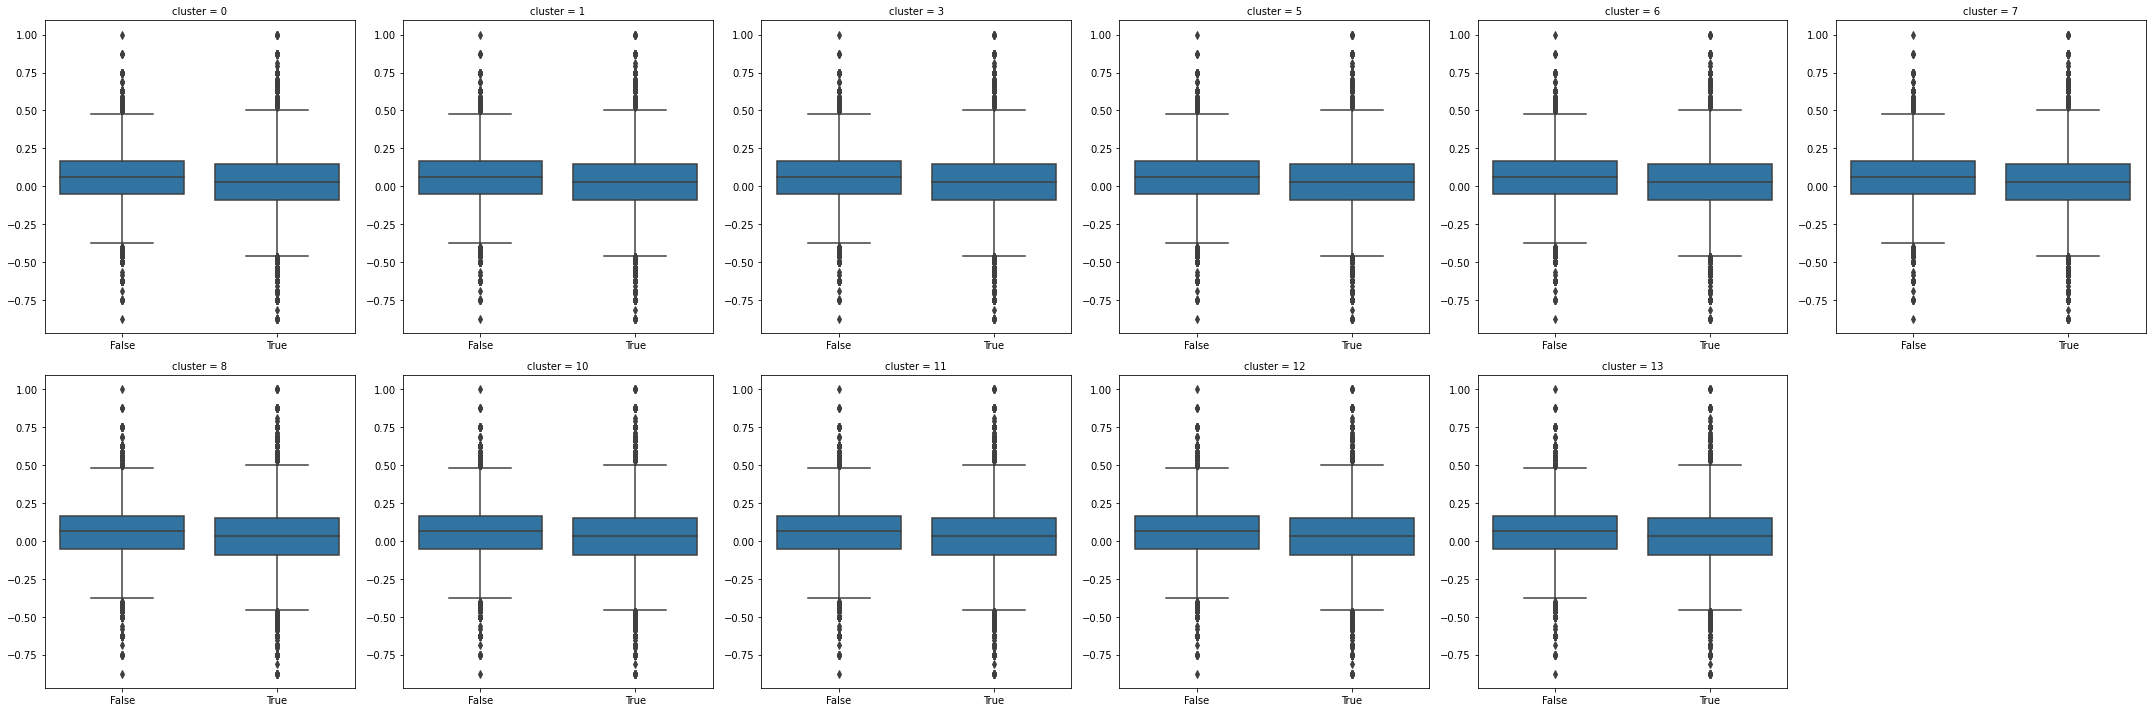

In [ ]:
# def plot(source = Source):
#   if source == Source.SPIEGEL:
#     textblob = 'Textblob-de'
#     senti = 'SentiWS'
#   else:
#     textblob = 'Textblob'
#     senti = 'SentiWordNet'

#   sub_df = df[(df.source == source)]
#   article_df = df[(df.source == source) & df.is_comment == False]
#   comment_df = df[(df.source == source) & df.is_comment == True]

#   weights = []
#   for i in range(OptimalKClustersConfig.k_with_garbage): 
#     if i not in OptimalKClustersConfig.garbage_clusters:
#       weights.append(article_df[article_df.cluster == i].shape[0] / article_df.shape[0])
#       weights.append(comment_df[comment_df.cluster == i].shape[0] / comment_df.shape[0])

#   fig = plt.figure(figsize=(32, 32))
#   g = sns.FacetGrid(sub_df, col = 'cluster', col_wrap = 6, sharex = False, sharey = False, height = , despine=False)
#   g.map(sns.boxplot, data = sub_df, x = 'is_comment', y = 'sentiw_sentiment', orient = '')
#   # box = sns.boxplot(data = sub_df, x = 'is_comment', y = 'sentiw_sentiment', hue = 'cluster')
#   # plt.setp(box.widths, 0.2)
#   # plt.setp(box['fliers'], color = 'lightgrey', alpha = 0.3)
#   # plt.xticks(range(1, 23), xticks, rotation = 90)
#   # plt.title(textblob + ' for ' + str.upper(source))
#   plt.show()
#   # fig.savefig('boxplot_for_' + textblob + source + '.pdf')

# plot(Source.NYTIMES)

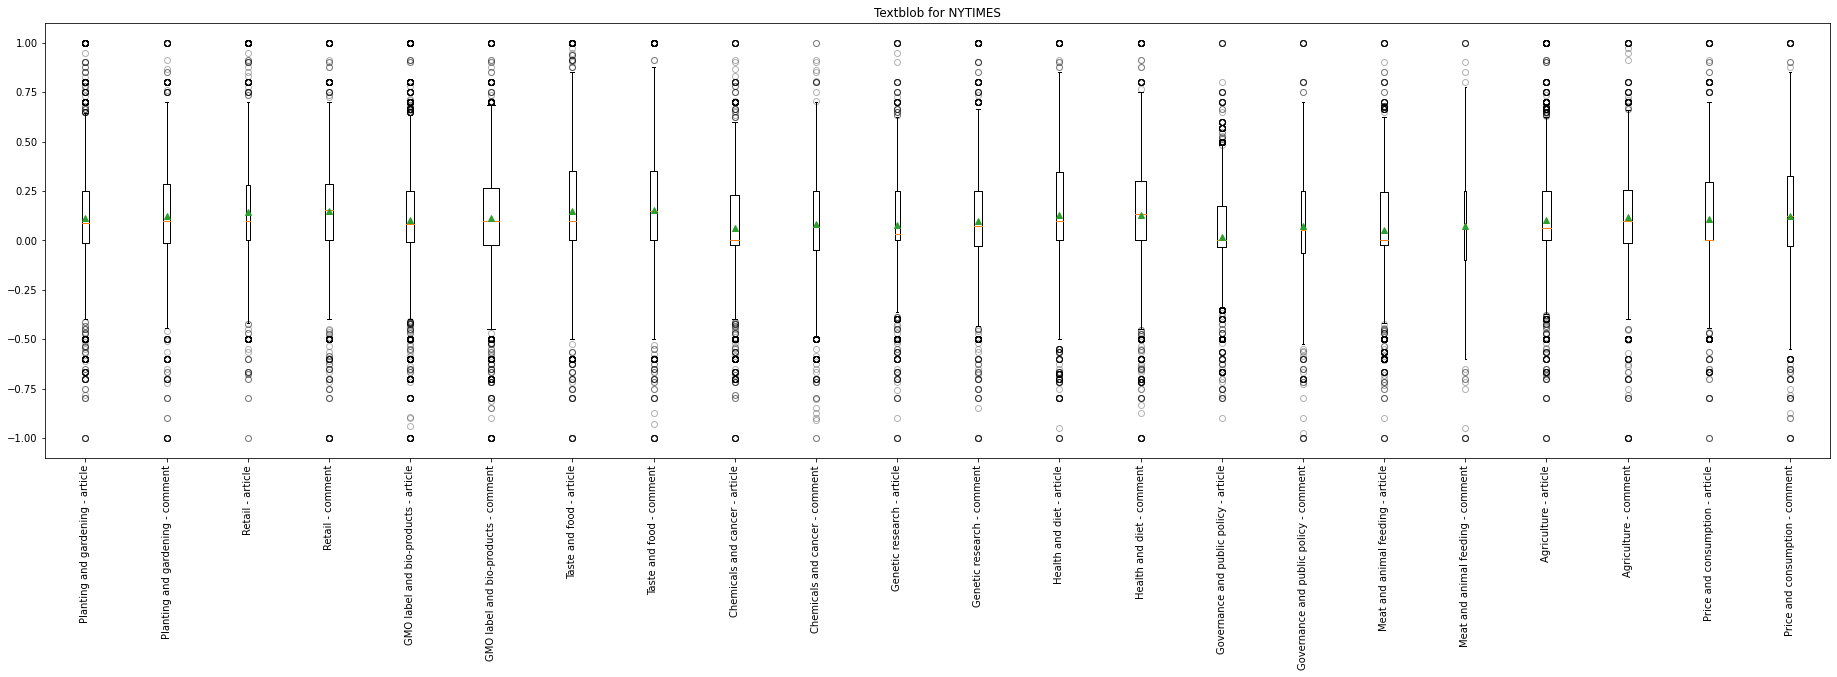

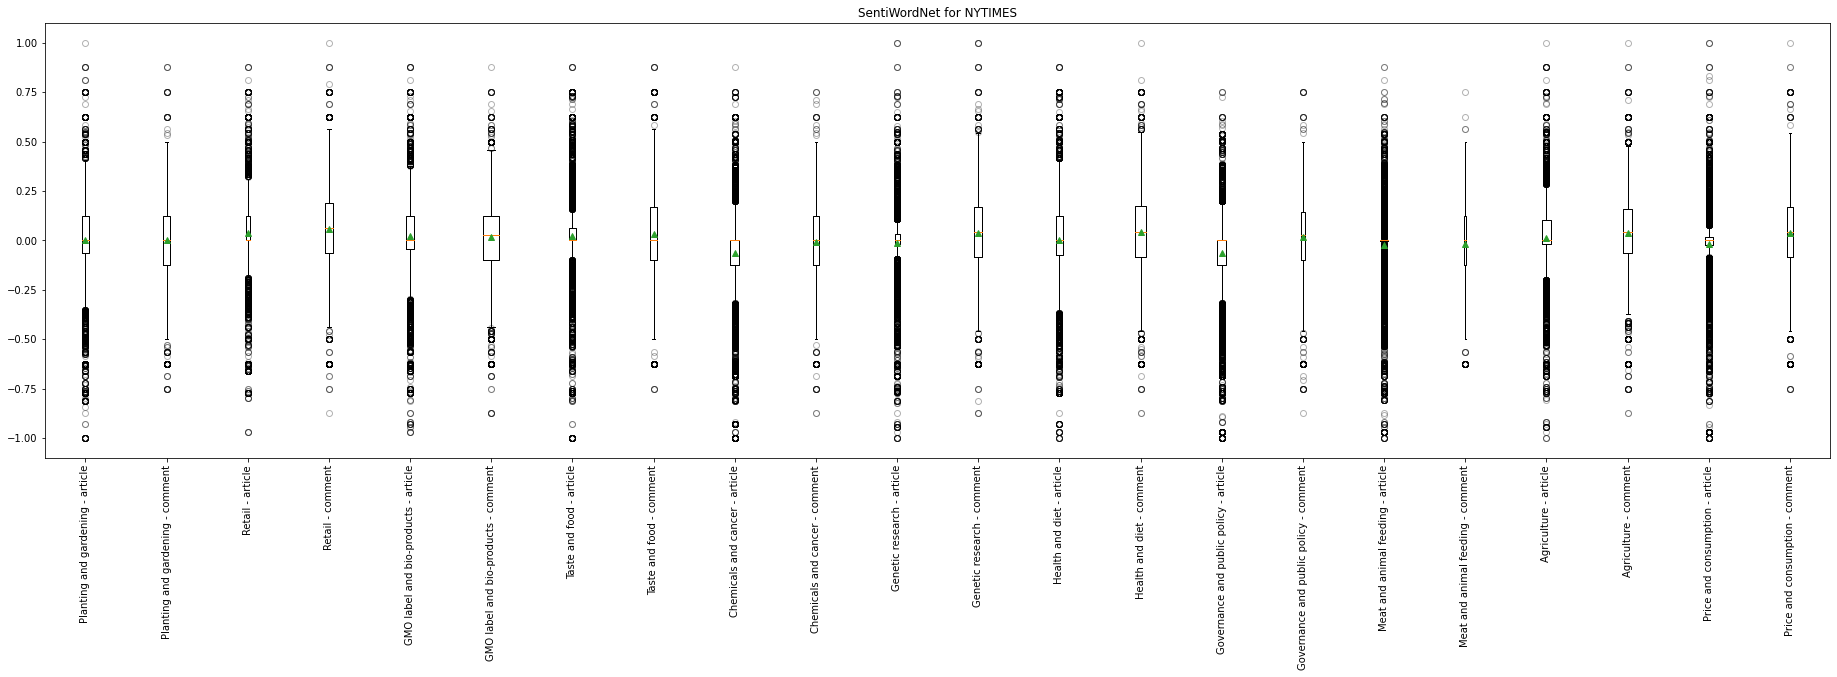

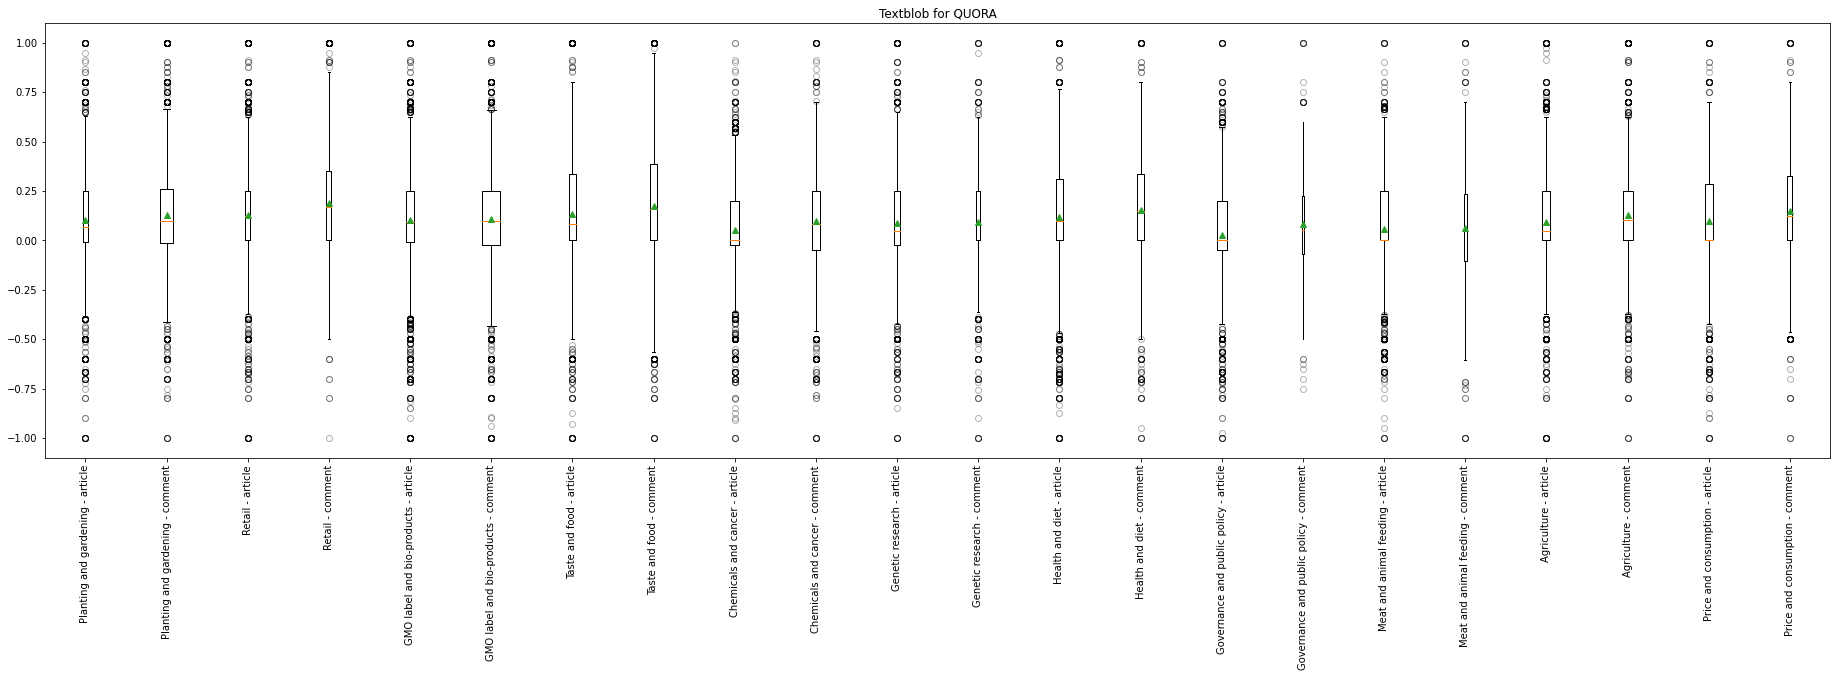

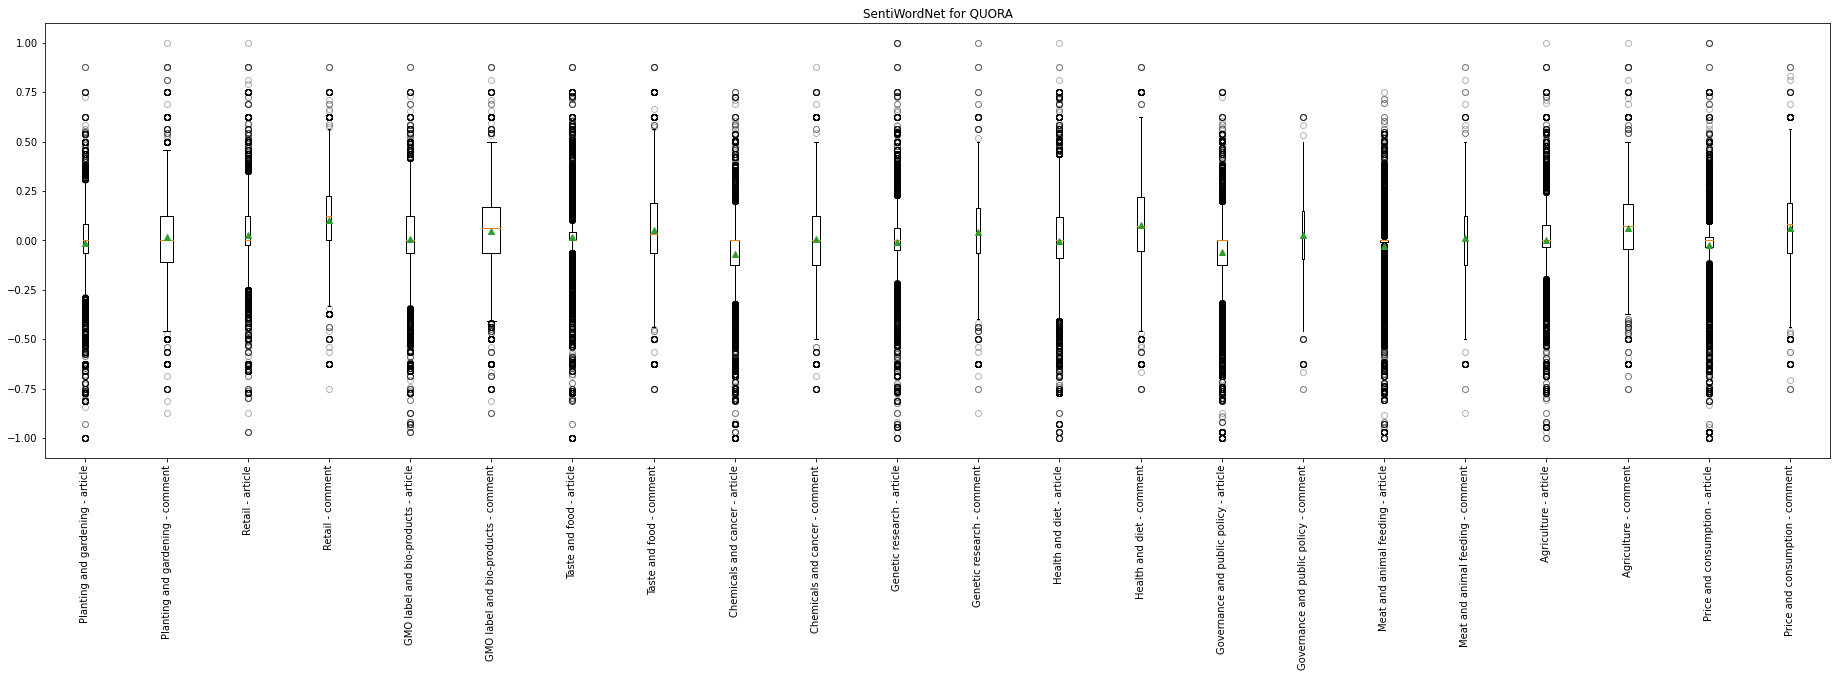

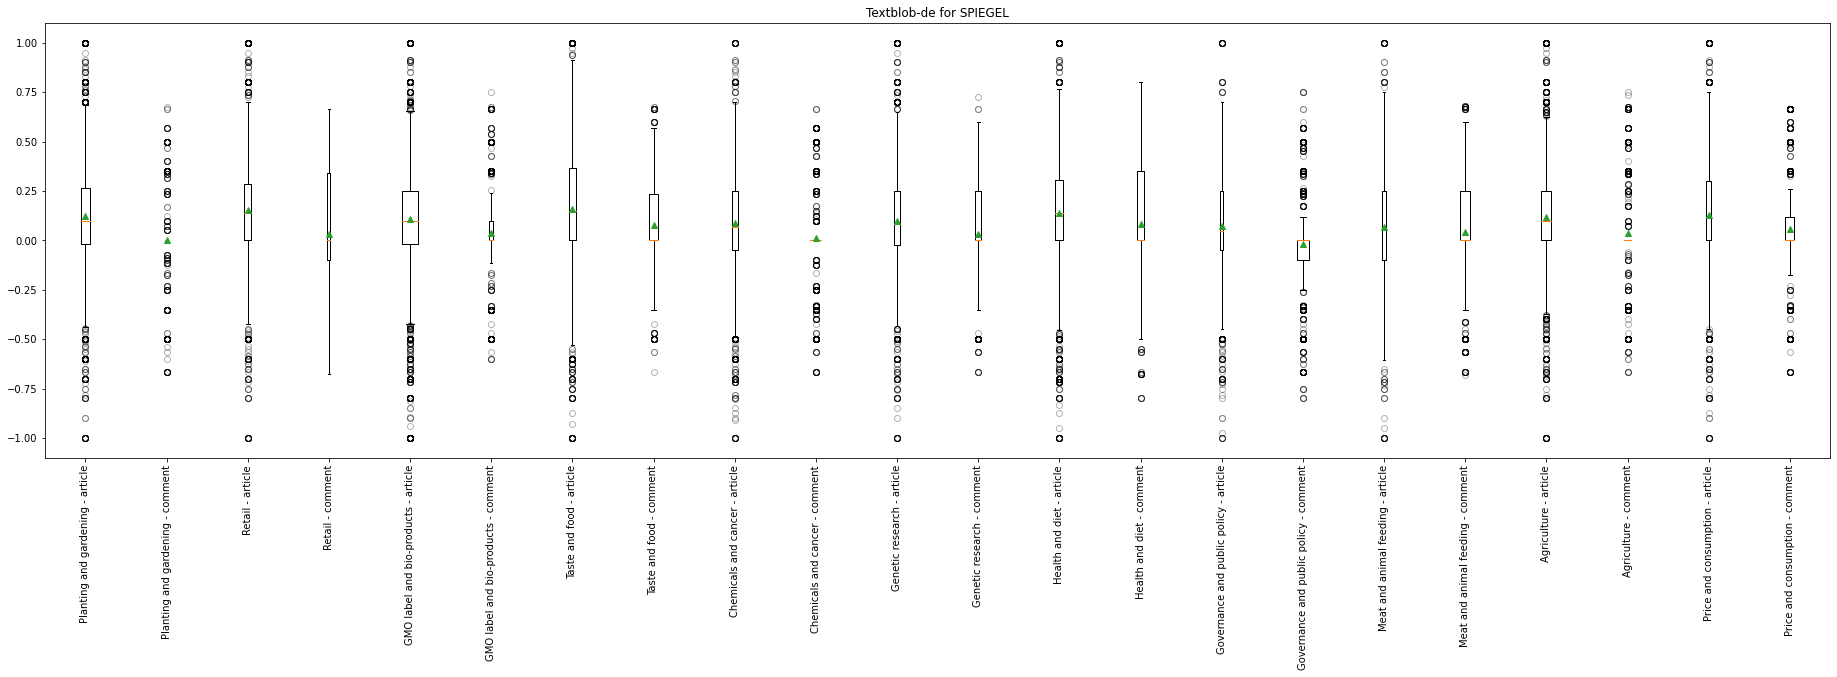

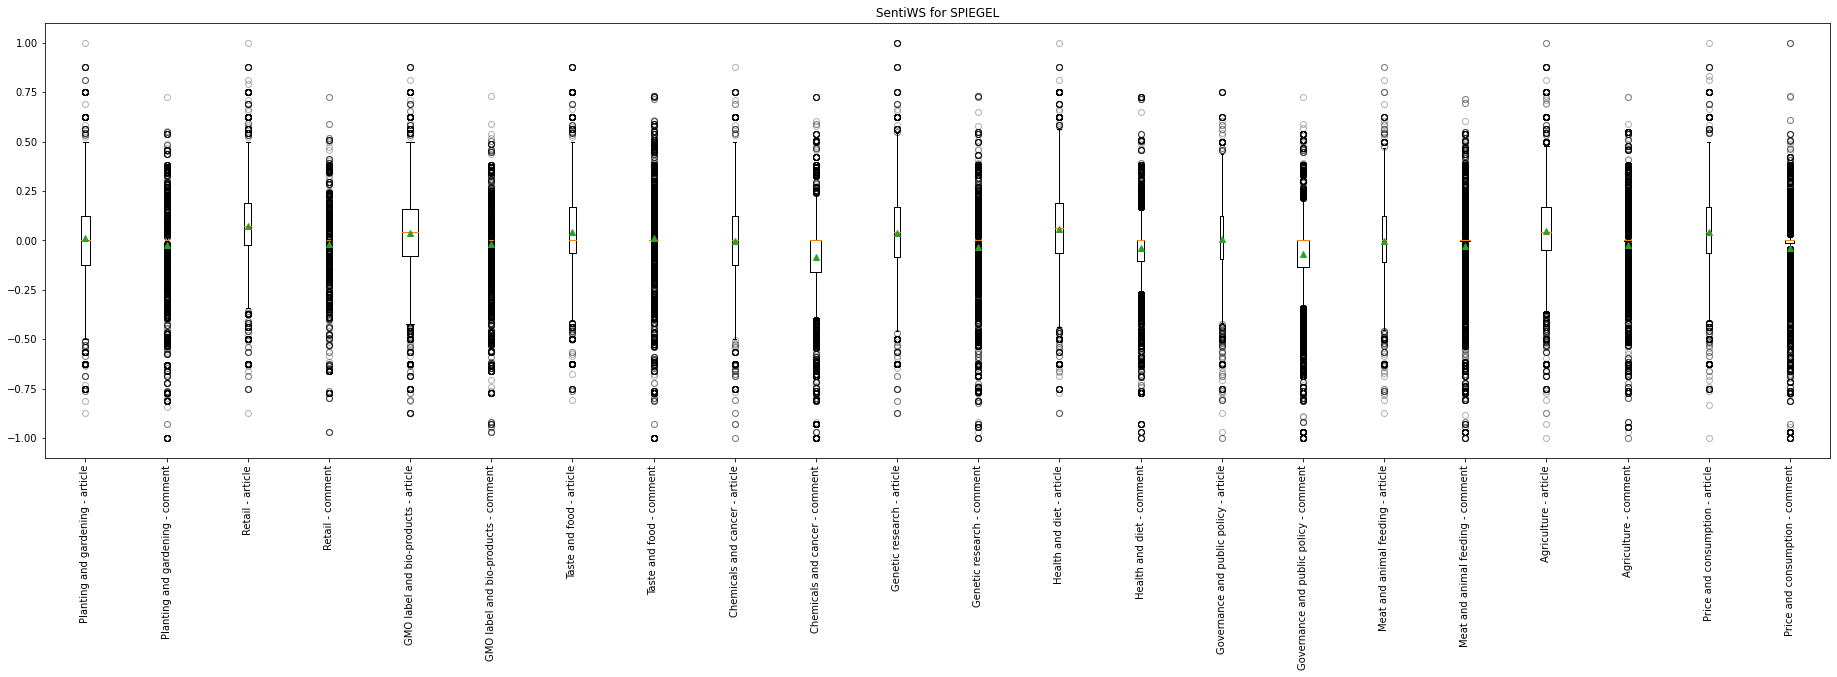

In [ ]:
# def plot(source = Source):

#   if source == Source.SPIEGEL:
#     textblob = 'Textblob-de'
#     senti = 'SentiWS'
#   else:
#     textblob = 'Textblob'
#     senti = 'SentiWordNet'

#   article_df = df[(df.source == source) & df.is_comment == False]
#   comment_df = df[(df.source == source) & df.is_comment == True]

#   senti_x = []
#   textblob_x = []
#   weights = []
#   xticks = []
#   for i in range(OptimalKClustersConfig.k_with_garbage): 
#     if i not in OptimalKClustersConfig.garbage_clusters:
#       senti_x.append(article_df[article_df.cluster == i].sentiw_sentiment)
#       senti_x.append(comment_df[comment_df.cluster == i].sentiw_sentiment)

#       textblob_x.append(article_df[(article_df.cluster == i) & (article_df.textblob_subjectivity != 0)].textblob_polarity)
#       textblob_x.append(comment_df[(comment_df.cluster == i) & (comment_df.textblob_subjectivity != 0)].textblob_polarity)

#       weights.append(article_df[article_df.cluster == i].shape[0] / article_df.shape[0])
#       weights.append(comment_df[comment_df.cluster == i].shape[0] / comment_df.shape[0])

#       xticks.append(OptimalKClustersConfig.clusters_with_garbage[i] + ' - article')
#       xticks.append(OptimalKClustersConfig.clusters_with_garbage[i] + ' - comment')

  
#   fig = plt.figure(figsize=(32, 8))
#   box = plt.boxplot(textblob_x, widths = weights, showmeans = True)
#   plt.setp(box['fliers'], color = 'lightgrey', alpha = 0.3)
#   plt.xticks(range(1, 23), xticks, rotation = 90)
#   plt.title(textblob + ' for ' + str.upper(source))
#   plt.show()
#   fig.savefig('boxplot_for_' + textblob + source + '.pdf')

#   fig = plt.figure(figsize=(32, 8))
#   box = plt.boxplot(senti_x, widths = weights, showmeans = True)
#   plt.setp(box['fliers'], color = 'lightgrey', alpha = 0.3)
#   plt.xticks(range(1, 23), xticks, rotation = 90)
#   plt.title(senti + ' for ' + str.upper(source))
#   plt.show()
#   fig.savefig('boxplot_for_' + senti + source + '.pdf')
#   # for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#   #       plt.setp(box[item], color='purple')
#   # plt.setp(box["boxes"], facecolor='purple')
#   # plt.setp(box["fliers"], markeredgecolor='purple')
  
  
# plot(Source.NYTIMES)
# plot(Source.QUORA)
# plot(Source.SPIEGEL)

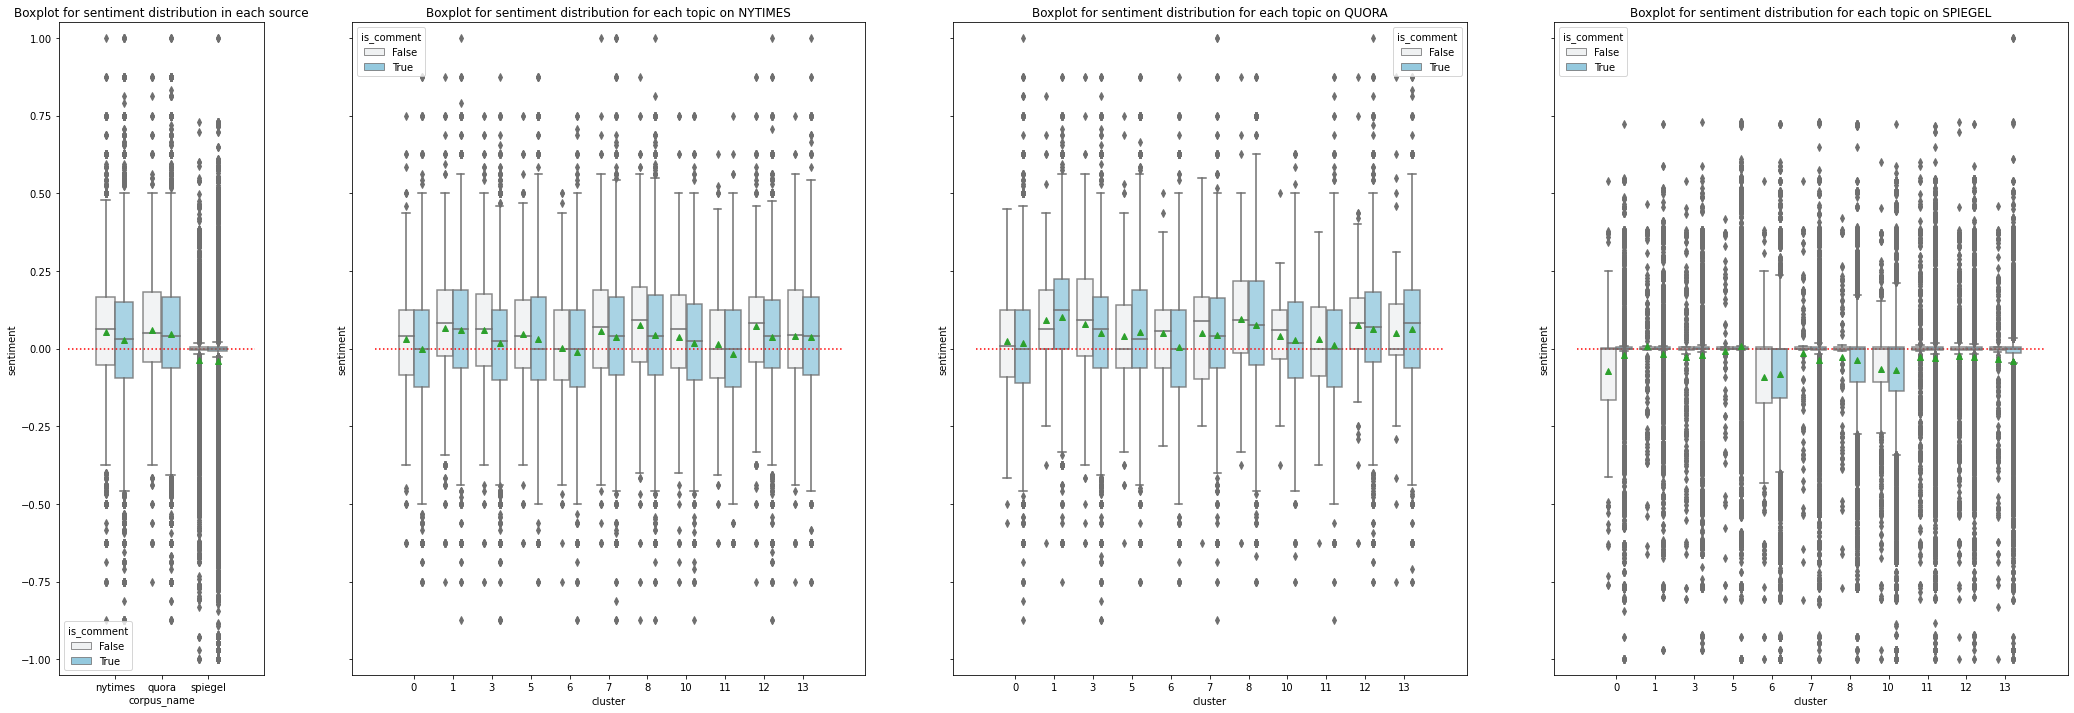

In [ ]:
# # source = Source.SPIEGEL
# # # by_cluster = True

# # sub_article = df[(df.source == source)]
# # # sub_comment = df[(df.source ==  source) & (df.comment_id != DocType.NON_COMMENT.value)]

# # # if by_cluster:
# # #   clustered_article_list = []
# # #   clustered_comment_list = []
# # #   for i in range(OptimalKClustersConfig.k_with_garbage):
# # #     # print(i)
# # #     if i not in OptimalKClustersConfig.garbage_clusters:
# # #       clustered_article_list.append(sub_article[sub_article.cluster == i]['sentiment'])
# # #       clustered_comment_list.append(sub_comment[sub_comment.cluster == i]['sentiment'])

# # df[(df.source == source)]

# # f, ax = plt.subplots(figsize = (20, 12))
# f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True, figsize = (36, 12), gridspec_kw={'width_ratios': [2, 5, 5, 5]})
# sns.boxplot(ax = ax1, x = 'source', y = 'sentiment', data = df, hue = 'is_comment', color = 'skyblue', showmeans = True, boxprops = dict(alpha = 0.8))
# sns.boxplot(ax = ax2, x = 'cluster', y = 'sentiment', data = df[(df.source == Source.NYTIMES)], hue = 'is_comment', color = 'skyblue', showmeans = True, boxprops = dict(alpha = 0.8))
# sns.boxplot(ax = ax3, x = 'cluster', y = 'sentiment', data = df[(df.source == Source.QUORA)], hue = 'is_comment', color = 'skyblue', showmeans = True, boxprops = dict(alpha = 0.8))
# sns.boxplot(ax = ax4, x = 'cluster', y = 'sentiment', data = df[(df.source == Source.SPIEGEL)], hue = 'is_comment', color = 'skyblue', showmeans = True, boxprops = dict(alpha = 0.8))

# # # Add transparency to colors
# # for patch in ax1.artists:
# #  r, g, b, a = patch.get_facecolor()
# #  patch.set_facecolor((r, g, b, .3))
# # for patch in ax2.artists:
# #  r, g, b, a = patch.get_facecolor()
# #  patch.set_facecolor((r, g, b, .3))

# ax1.hlines(y = 0, xmin = -1, xmax = 3, color = 'red', linestyles = 'dotted')
# ax1.set(title = 'Boxplot for sentiment distribution in each source')
# ax2.hlines(y = 0, xmin = -1, xmax = 11, color = 'red', linestyles = 'dotted')
# ax2.set(title = 'Boxplot for sentiment distribution for each topic on ' + str.upper(Source.NYTIMES))
# ax3.hlines(y = 0, xmin = -1, xmax = 11, color = 'red', linestyles = 'dotted')
# ax3.set(title = 'Boxplot for sentiment distribution for each topic on ' + str.upper(Source.QUORA))
# ax4.hlines(y = 0, xmin = -1, xmax = 11, color = 'red', linestyles = 'dotted')
# ax4.set(title = 'Boxplot for sentiment distribution for each topic on ' + str.upper(Source.SPIEGEL))
# plt.ylim(-1.05, 1.05)
# plt.show()

## 3. Distribution of sentiment and hotness over time (global distribution for different time interval)

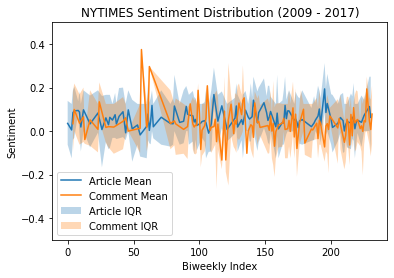

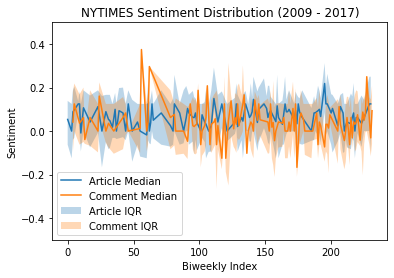

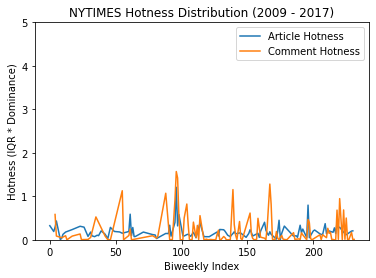

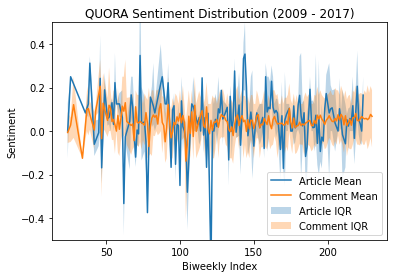

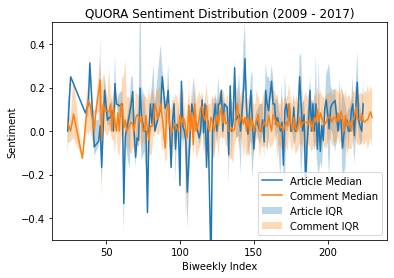

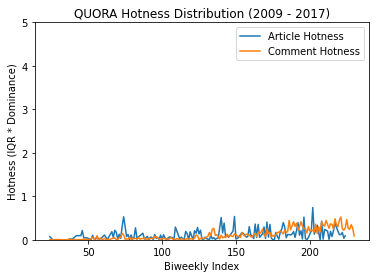

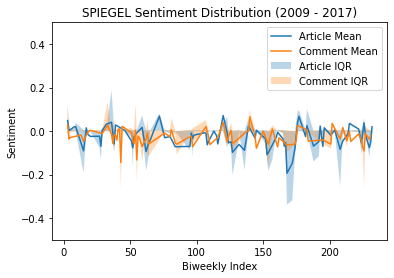

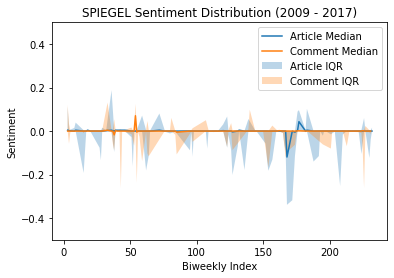

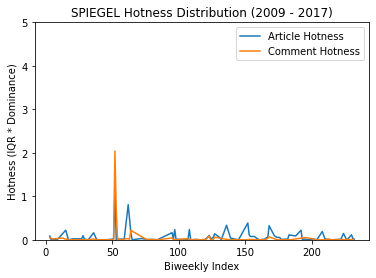

In [ ]:
def get_biweekly_stat(df, interval_list):
  stat_df = pd.DataFrame({'sentiment_mean': df.groupby(by = ['index_14D']).sentiw_sentiment.mean(),
                'sentiment_median': df.groupby(by = ['index_14D']).sentiw_sentiment.median(),
                'sentiment_count': df.groupby(by = ['index_14D']).sentiw_sentiment.count(),
                'sentiment_first_quantile': df.groupby(by = ['index_14D']).sentiw_sentiment.quantile(0.25),
                'sentiment_third_quantile': df.groupby(by = ['index_14D']).sentiw_sentiment.quantile(0.75),
                'total_count': df.shape[0]
                }).reset_index()

  stat_df['iqr'] = stat_df.sentiment_third_quantile - stat_df.sentiment_first_quantile
  stat_df['hotness'] = stat_df.iqr * (stat_df.sentiment_count / stat_df.total_count * 100)
  # stat_df['log_hotness'] = np.log(stat_df.hotness)
  
  # interval_df = pd.DataFrame({'index_14D': range(interval_list.size),
  #                           'interval': interval_list,
  #                           'timeline': pd.to_datetime(date_list)})
  # # interval_df['interval_start'] = 
  # stat_df = interval_df.join(stat_df, on = 'index_14D', how = 'left', lsuffix = '_all', rsuffix = '')
  return stat_df

def plot_biweekly_stat(source, by ='mean'):
  
  sub_article = biweekly_df[(biweekly_df.source == source) & (biweekly_df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = biweekly_df[(biweekly_df.source ==  source) & (biweekly_df.comment_id != DocType.NON_COMMENT.value)]  

  sub_article_stat = get_biweekly_stat(sub_article, interval_list)
  sub_comment_stat = get_biweekly_stat(sub_comment, interval_list)

  # display(sub_article_stat)
  # display(sub_comment_stat)
  # print(sub_comment_stat['index_14D'].max())
  # print(sub_comment_stat['index_14D'].max())
  # print(sub_article_stat['index_14D'].max())

  if by == 'hotness':
    g = sns.lineplot(data = sub_article_stat, x = 'index_14D', y = 'hotness', label = 'Article Hotness')
    sns.lineplot(data = sub_comment_stat, x = 'index_14D', y = 'hotness', label = 'Comment Hotness')
  elif by == 'mean':
    g = sns.lineplot(data = sub_article_stat, x = 'index_14D', y = 'sentiment_mean', label = 'Article Mean')
    sns.lineplot(data = sub_comment_stat, x = 'index_14D', y = 'sentiment_mean', label = 'Comment Mean')
  elif by == 'median':
    g = sns.lineplot(data = sub_article_stat, x = 'index_14D', y = 'sentiment_median', label = 'Article Median')
    sns.lineplot(data = sub_comment_stat, x = 'index_14D', y = 'sentiment_median', label = 'Comment Median')


  if by == 'hotness':
    g.set(xlabel='Biweekly Index', ylabel='Hotness (IQR * Dominance)')
    g.set_title('{} Hotness Distribution ({} - {})'.format(str.upper(source), start_year, end_year))
    plt.ylim(0, 5)
  else:
    g.fill_between(x = sub_article_stat['index_14D'], y1 = sub_article_stat.sentiment_third_quantile, y2 = sub_article_stat.sentiment_first_quantile, alpha = 0.3, label = 'Article IQR')
    g.fill_between(x = sub_comment_stat['index_14D'], y1 = sub_comment_stat.sentiment_third_quantile, y2 = sub_comment_stat.sentiment_first_quantile, alpha = 0.3, label = 'Comment IQR')
    g.set(xlabel='Biweekly Index', ylabel='Sentiment')
    g.set_title('{} Sentiment Distribution ({} - {})'.format(str.upper(source), start_year, end_year))
    plt.ylim(-0.5, 0.5)
  
  plt.legend()
  plt.show()
  # g.set(xticklabels = [date_list[0], date_list[50], date_list[100], date_list[150], date_list[200]])
  # plt.xticks(rotation = 50)

  # sns.pointplot(data = sub_article_stat, x = 'index_14D', y = 'sentiment_mean')
  # sns.pointplot(data = sub_comment_stat, x = 'index_14D', y = 'sentiment_mean')

  

plot_biweekly_stat(source = Source.NYTIMES, by = 'mean')
plot_biweekly_stat(source = Source.NYTIMES, by = 'median')
plot_biweekly_stat(source = Source.NYTIMES, by = 'hotness')
plot_biweekly_stat(source = Source.QUORA, by = 'mean')
plot_biweekly_stat(source = Source.QUORA, by = 'median')
plot_biweekly_stat(source = Source.QUORA, by = 'hotness')
plot_biweekly_stat(source = Source.SPIEGEL, by = 'mean')
plot_biweekly_stat(source = Source.SPIEGEL, by = 'median')
plot_biweekly_stat(source = Source.SPIEGEL, by = 'hotness')

## Distribution of sentiment and hotness over time (for each topic with biweekly interval)

In [ ]:
def get_biweekly_stat_per_topic(df, interval_list):
  stat_df = pd.DataFrame({'sentiment_mean': df.groupby(by = ['cluster', 'index_14D']).sentiw_sentiment.mean(),
                'sentiment_median': df.groupby(by = ['cluster', 'index_14D']).sentiw_sentiment.median(),
                'sentiment_count': df.groupby(by = ['cluster', 'index_14D']).sentiw_sentiment.count(),
                'sentiment_first_quantile': df.groupby(by = ['cluster', 'index_14D']).sentiw_sentiment.quantile(0.25),
                'sentiment_third_quantile': df.groupby(by = ['cluster', 'index_14D']).sentiw_sentiment.quantile(0.75)
                }).reset_index()

  stat_df['iqr'] = stat_df.sentiment_third_quantile - stat_df.sentiment_first_quantile
  tmp_df = pd.DataFrame({'cluster_total_count': df.groupby(by = ['cluster']).sentiw_sentiment.count()}).reset_index()
  # display(tmp_df)

  stat_df = pd.merge(stat_df, tmp_df, how = 'left', on = 'cluster', suffixes=('', '_y'))
  stat_df['hotness'] = stat_df.iqr * (stat_df.sentiment_count / stat_df.cluster_total_count * 100)

  return stat_df

def plot_biweekly_stat_per_topic(source, by = 'mean'):
  sub_article = biweekly_df[(biweekly_df.source == source) & (biweekly_df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = biweekly_df[(biweekly_df.source ==  source) & (biweekly_df.comment_id != DocType.NON_COMMENT.value)]

  sub_article_stat = get_biweekly_stat_per_topic(sub_article, interval_list)
  sub_comment_stat = get_biweekly_stat_per_topic(sub_comment, interval_list)

  sub_article_stat['type'] = 'Article'
  sub_comment_stat['type'] = 'Comment'

  stat_df = pd.concat([sub_article_stat, sub_comment_stat])

  # g = sns.FacetGrid(data = stat_df, col = 'cluster', hue = 'type', col_wrap = 4) # dropna = True
  g = sns.FacetGrid(data = stat_df, col = 'cluster', hue = 'type')
  if by == 'hotness': 
    g.map_dataframe(sns.lineplot, x = 'index_14D', y = 'hotness', label = 'Hotness')
    g.set_axis_labels('Biweekly Index', 'Hotness (IQR * Dominance)')
    # plt.title('{} Hotness Distribution ({} - {})'.format(str.upper(source), start_year, end_year))
    plt.ylim(0, 5)
    plt.legend(labels = ('Article Hotness', 'Comment Hotness'), loc = 'upper left')
  elif by == 'mean':
    g.map_dataframe(sns.lineplot, x = 'index_14D', y = 'sentiment_mean', label = 'Mean')
    g.map_dataframe(plt.fill_between, x = 'index_14D', y1 = 'sentiment_third_quantile', y2 = 'sentiment_first_quantile', alpha = 0.3, label = 'IQR')
    g.set_axis_labels('Biweekly Index', 'Sentiment')
    # plt.title('{} Sentiment Distribution ({} - {})'.format(str.upper(source), start_year, end_year))
    plt.ylim(-0.5, 0.5)
    plt.legend(labels = ('Article Mean', 'Comment Mean', 'Article IQR', 'Comment IQR'), loc = 'upper left')
  elif by == 'median':
    g.map_dataframe(sns.lineplot, x = 'index_14D', y = 'sentiment_median', label = 'Median')
    g.map_dataframe(plt.fill_between, x = 'index_14D', y1 = 'sentiment_third_quantile', y2 = 'sentiment_first_quantile', alpha = 0.3, label = 'IQR')
    g.set_axis_labels('Biweekly Index', 'Sentiment')
    # plt.title('{} Sentiment Distribution ({} - {})'.format(str.upper(source), start_year, end_year))
    plt.ylim(-0.5, 0.5)
    plt.legend(labels = ('Article Median', 'Comment Median', 'Article IQR', 'Comment IQR'), loc = 'upper left')
  
  plt.show()

print(str.upper(Source.NYTIMES))
plot_biweekly_stat_per_topic(source = Source.NYTIMES, by = 'mean')
plot_biweekly_stat_per_topic(source = Source.NYTIMES, by = 'median')
plot_biweekly_stat_per_topic(source = Source.NYTIMES, by = 'hotness')
print()
print(str.upper(Source.QUORA))
plot_biweekly_stat_per_topic(source = Source.QUORA, by = 'mean')
plot_biweekly_stat_per_topic(source = Source.QUORA, by = 'median')
plot_biweekly_stat_per_topic(source = Source.QUORA, by = 'hotness')
print()
print(str.upper(Source.SPIEGEL))
plot_biweekly_stat_per_topic(source = Source.SPIEGEL, by = 'mean')
plot_biweekly_stat_per_topic(source = Source.SPIEGEL, by = 'median')
plot_biweekly_stat_per_topic(source = Source.SPIEGEL, by = 'hotness')

Output hidden; open in https://colab.research.google.com to view.

# Part 2: Relationship between distributions

## 1. simple relationship (without time dimension): A1 and C1 sentiment 
  - mean sentimen
  - article-wise

NYTIMES
Total of unique doc_id from article 193
Total of unique doc_id from comment 75
     article_id  mean_sentiment_article  mean_sentiment_comment
0             2               -0.059524                     NaN
1             4                0.077659                     NaN
2             6                0.097550                     NaN
3             9                0.160714                0.034612
4            10                0.000694                     NaN
..          ...                     ...                     ...
188         322                0.122880                0.009612
189         323                0.101276                0.046590
190         324                0.038251                0.038431
191         325                0.044346                0.038686
192         326                0.060418                0.028925

[193 rows x 3 columns]
         Min    1st Qu.   Median    Mean    3rd Qu.   Max    SD
article: -0.1242  0.0271  0.0502  0.0555  0.0884  0.1940 

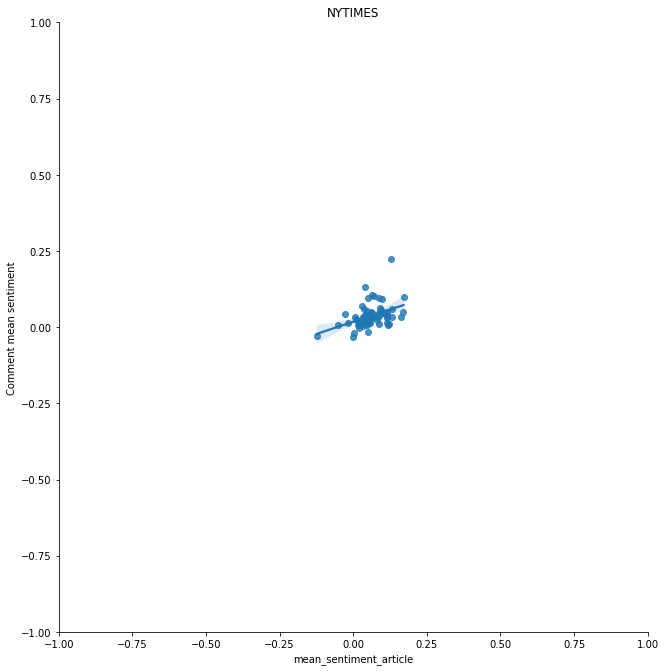

Total of unique doc_id from article 193
Total of unique doc_id from comment 75
Topic 0: Planting and gardening
Pearsons correlation: 0.2641 (p-value: 0.0762) with 46 point 
Topic 1: Retail
Pearsons correlation: -0.3426 (p-value: 0.0283) with 41 point 
Topic 3: GMO label and bio-products
Pearsons correlation: 0.3456 (p-value: 0.0079) with 58 point 
Topic 5: Taste and food
Pearsons correlation: 0.0948 (p-value: 0.5453) with 43 point 
Topic 6: Chemicals and cancer
Pearsons correlation: 0.0484 (p-value: 0.7727) with 38 point 
Topic 7: Genetic research
Pearsons correlation: 0.3143 (p-value: 0.0355) with 45 point 
Topic 8: Health and diet
Pearsons correlation: 0.3565 (p-value: 0.0088) with 53 point 
Topic 10: Governance and public policy
Pearsons correlation: 0.0067 (p-value: 0.9683) with 38 point 
Topic 11: Meat and animal feeding
Pearsons correlation: -0.0161 (p-value: 0.9447) with 21 point 
Topic 12: Agriculture
Pearsons correlation: 0.2412 (p-value: 0.1024) with 47 point 
Topic 13: Price

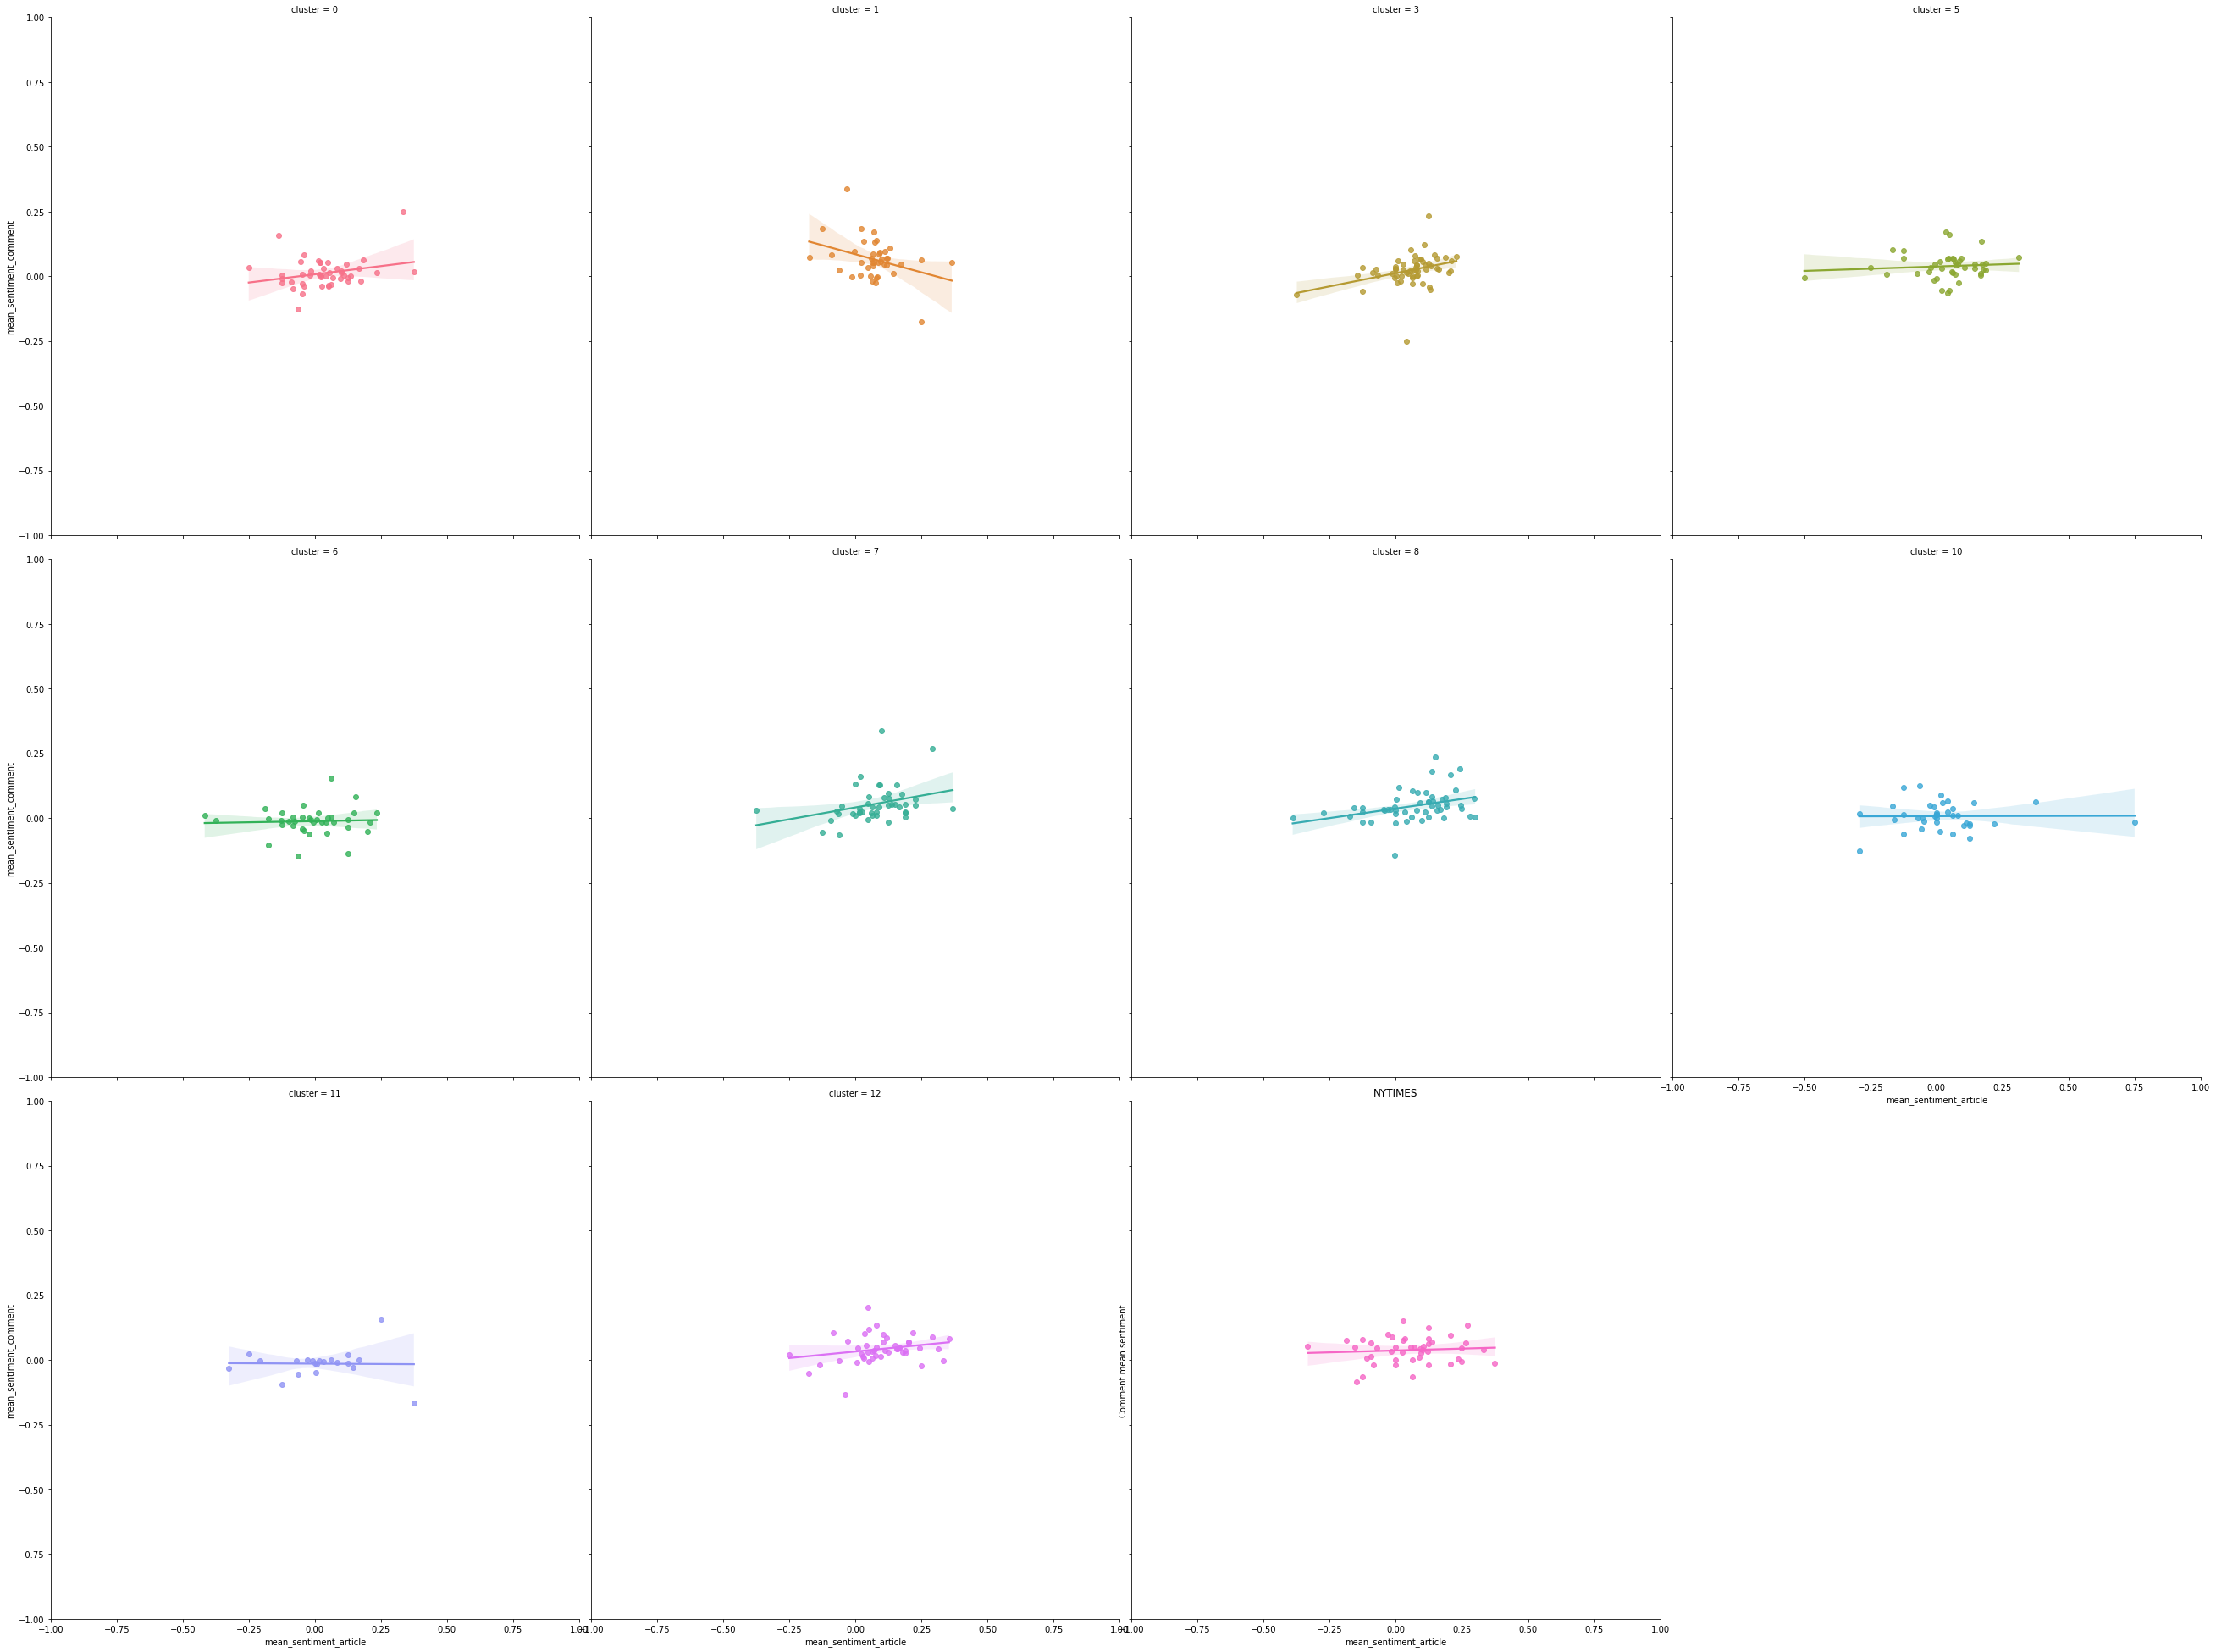



QUORA
Total of unique doc_id from article 434
Total of unique doc_id from comment 1288
      article_id  mean_sentiment_article  mean_sentiment_comment
0              7               -0.500000                0.108978
1              8               -0.125000                     NaN
2             12               -0.005787                0.054506
3             15               -0.062500                0.083964
4             22               -0.375000                0.187500
...          ...                     ...                     ...
1319        1487                     NaN                0.078711
1320        1488                     NaN                0.023621
1321        1491                     NaN                0.108557
1322        1493                     NaN                0.174479
1323        1494                     NaN                0.083790

[1324 rows x 3 columns]
         Min    1st Qu.   Median    Mean    3rd Qu.   Max    SD
article: -0.6250  nan  0.0539  0.0588  nan

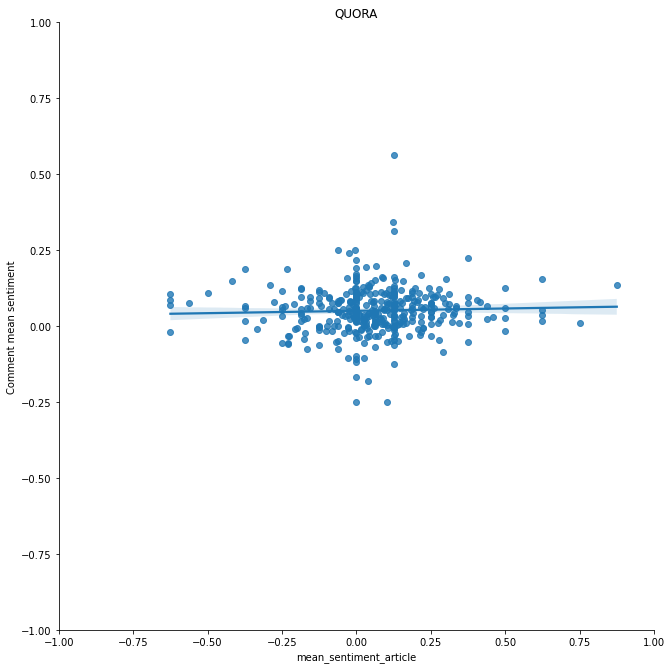

Total of unique doc_id from article 434
Total of unique doc_id from comment 1288
Topic 0: Planting and gardening
Pearsons correlation: 0.0721 (p-value: 0.5807) with 61 point 
Topic 1: Retail
Pearsons correlation: 0.0617 (p-value: 0.6608) with 53 point 
Topic 3: GMO label and bio-products
Pearsons correlation: -0.0376 (p-value: 0.6738) with 128 point 
Topic 5: Taste and food
Pearsons correlation: -0.0926 (p-value: 0.4111) with 81 point 
Topic 6: Chemicals and cancer
Pearsons correlation: 0.3781 (p-value: 0.0329) with 32 point 
Topic 7: Genetic research
Pearsons correlation: 0.0164 (p-value: 0.9436) with 21 point 
Topic 8: Health and diet
Pearsons correlation: 0.1874 (p-value: 0.2347) with 42 point 
Topic 10: Governance and public policy
Pearsons correlation: -0.1610 (p-value: 0.6569) with 10 point 
Topic 11: Meat and animal feeding
Pearsons correlation: 0.1479 (p-value: 0.5845) with 16 point 
Topic 12: Agriculture
Pearsons correlation: -0.0474 (p-value: 0.7516) with 47 point 
Topic 13: 

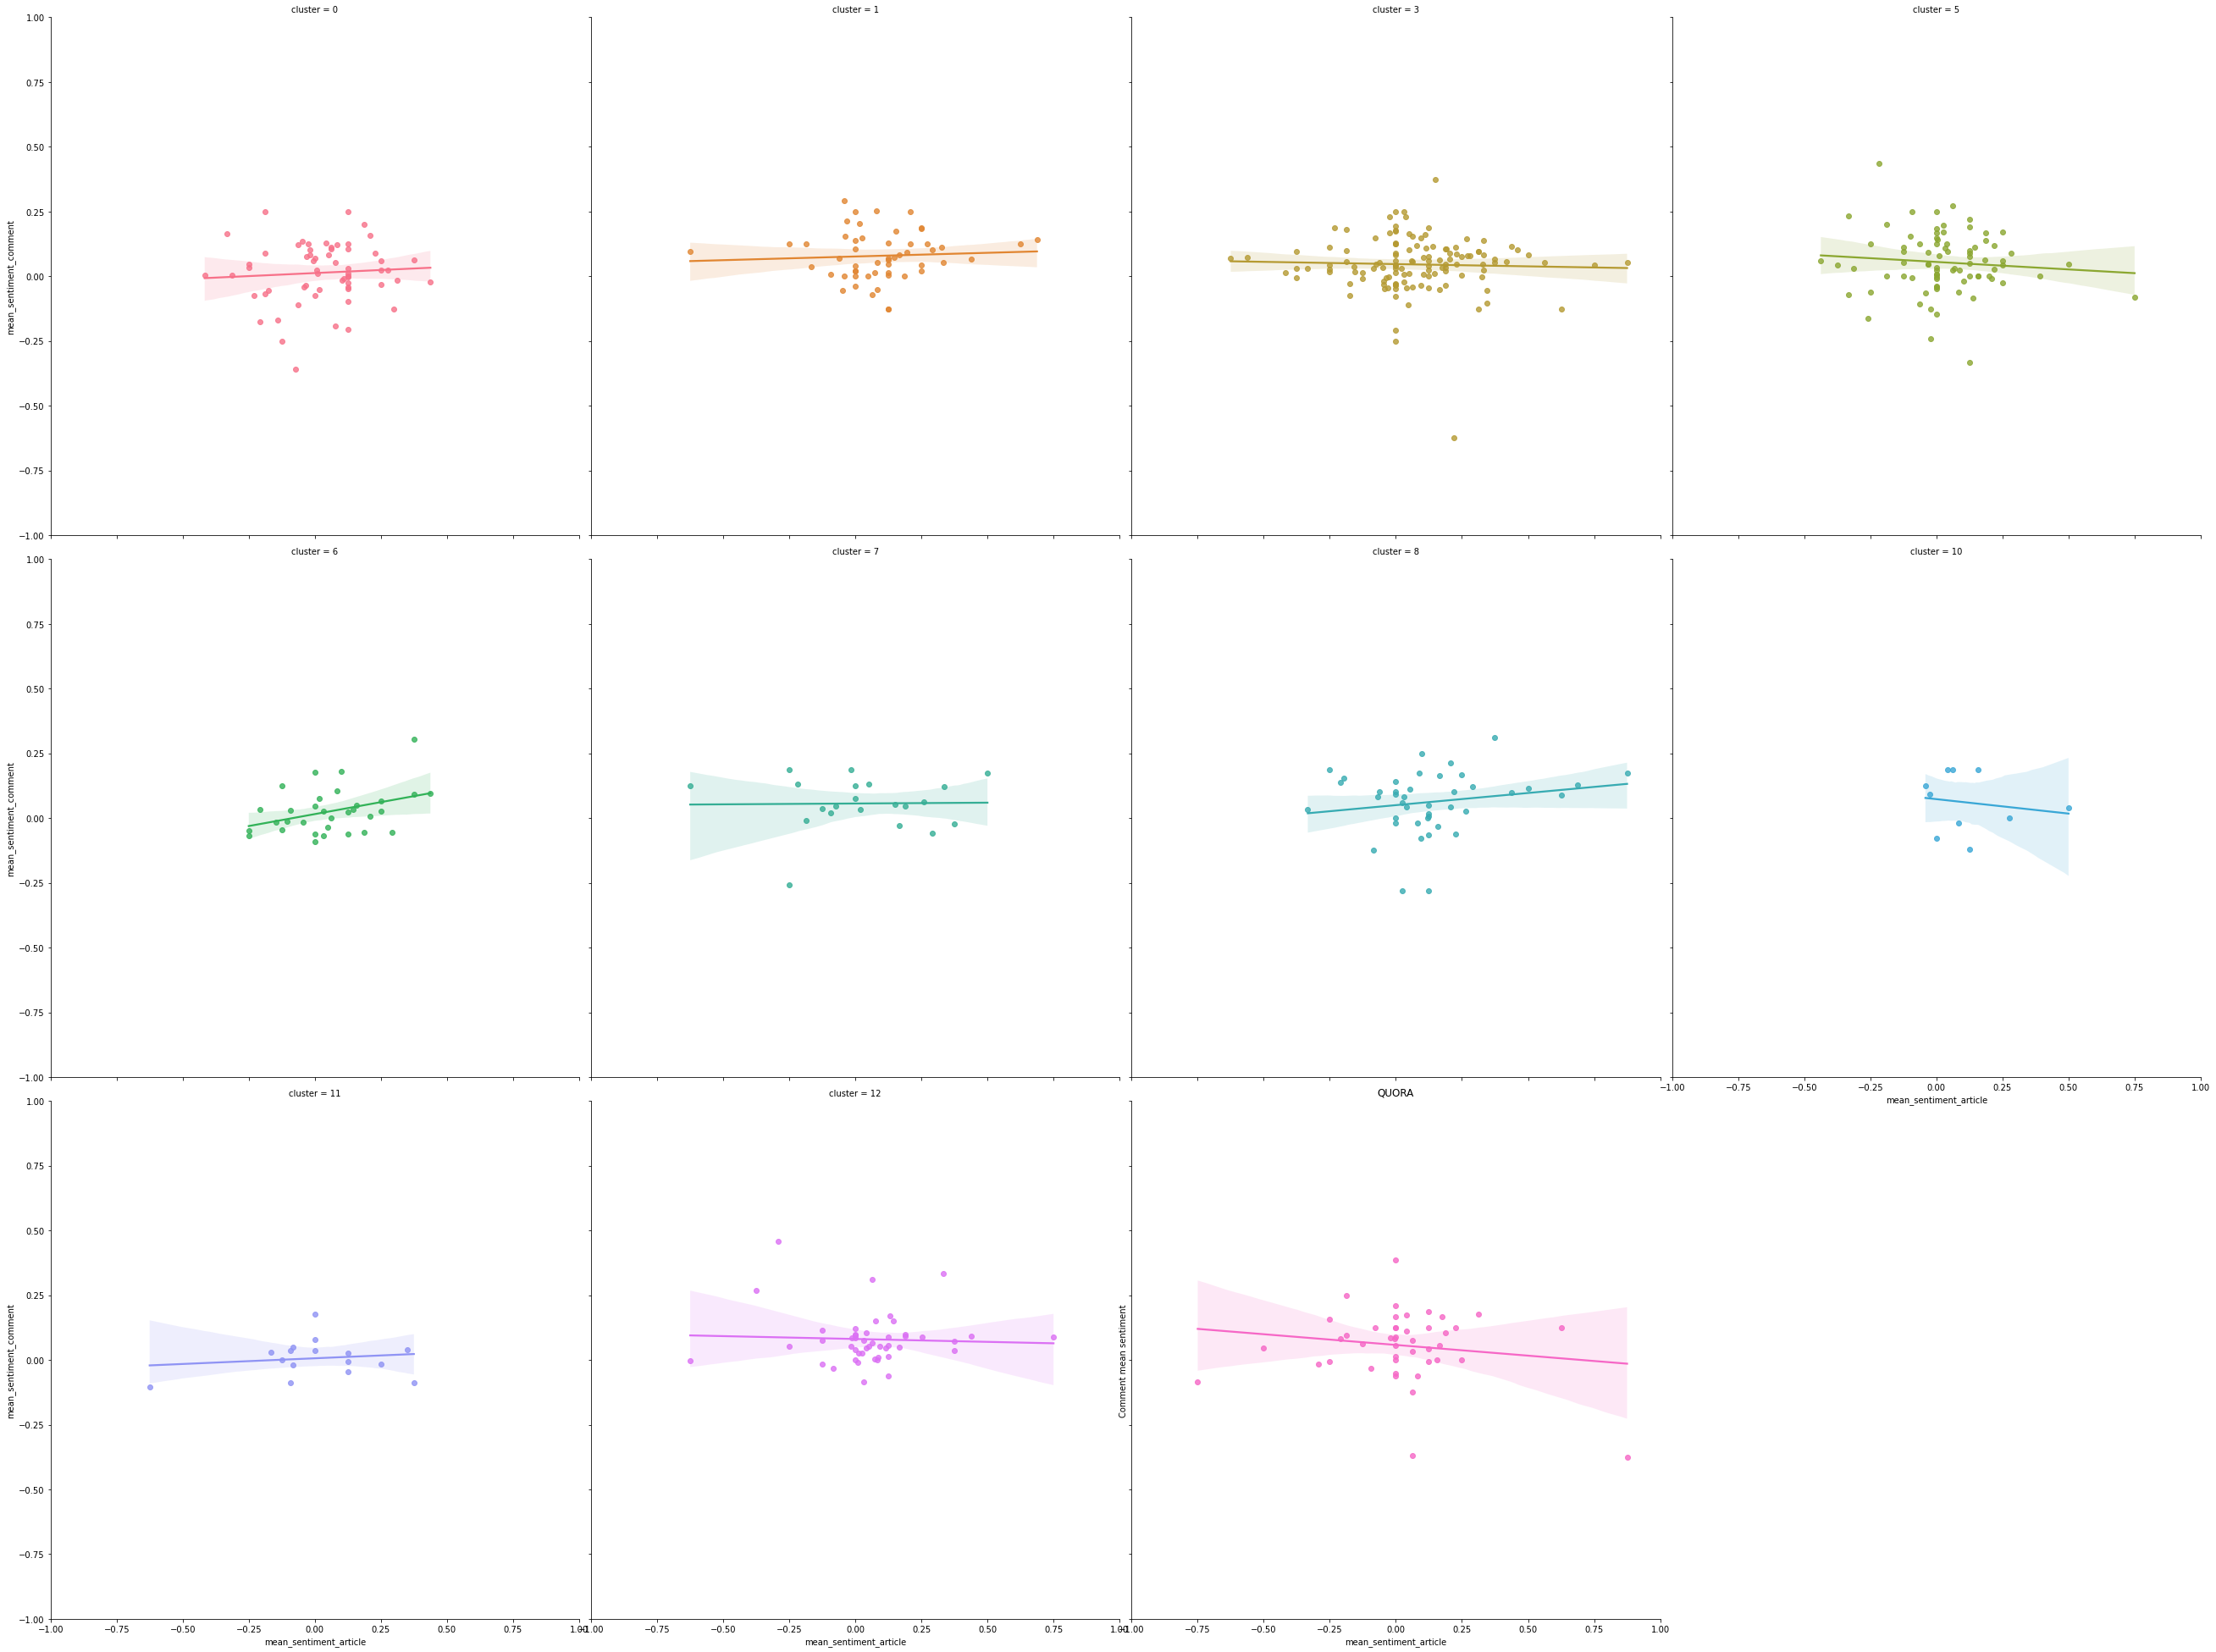



SPIEGEL
Total of unique doc_id from article 116
Total of unique doc_id from comment 61
     article_id  mean_sentiment_article  mean_sentiment_comment
0             0               -0.061605                     NaN
1             1               -0.091750                     NaN
2             2                0.022335                     NaN
3             3               -0.020428                     NaN
4             4               -0.027194                     NaN
..          ...                     ...                     ...
117          54                     NaN               -0.079087
118          56                     NaN                0.004785
119          62                     NaN                0.014132
120          72                     NaN               -0.030009
121          84                     NaN                0.014132

[122 rows x 3 columns]
         Min    1st Qu.   Median    Mean    3rd Qu.   Max    SD
article: -0.1941  nan  -0.0350  -0.0323  nan  0.0715  0

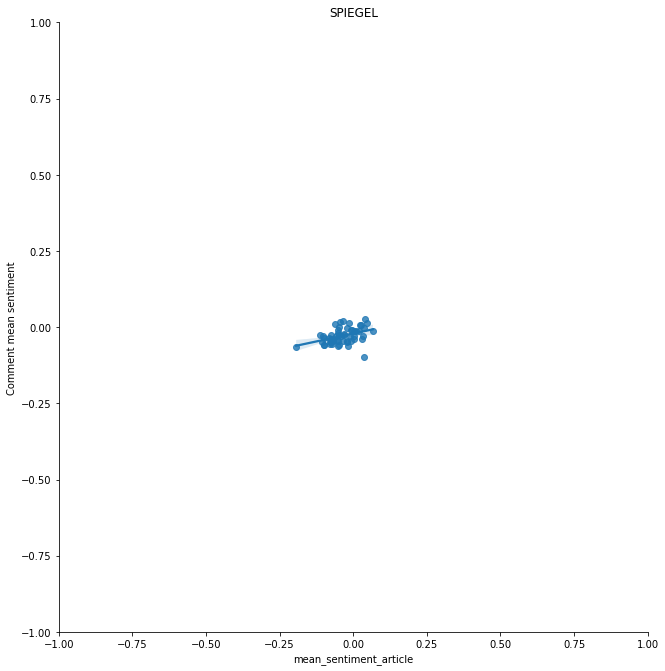

Total of unique doc_id from article 116
Total of unique doc_id from comment 61
Topic 0: Planting and gardening
Pearsons correlation: 0.1576 (p-value: 0.4619) with 24 point 
Topic 1: Retail
Pearsons correlation: -0.0489 (p-value: 0.7739) with 37 point 
Topic 3: GMO label and bio-products
Pearsons correlation: 0.1899 (p-value: 0.2342) with 41 point 
Topic 5: Taste and food
Pearsons correlation: 0.3273 (p-value: 0.0891) with 28 point 
Topic 6: Chemicals and cancer
Pearsons correlation: 0.2649 (p-value: 0.1498) with 31 point 
Topic 7: Genetic research
Pearsons correlation: 0.3734 (p-value: 0.0460) with 29 point 
Topic 8: Health and diet
Pearsons correlation: 0.3836 (p-value: 0.0530) with 26 point 
Topic 10: Governance and public policy
Pearsons correlation: 0.0590 (p-value: 0.6971) with 46 point 
Topic 11: Meat and animal feeding
Pearsons correlation: 0.4145 (p-value: 0.0148) with 34 point 
Topic 12: Agriculture
Pearsons correlation: 0.0598 (p-value: 0.6996) with 44 point 
Topic 13: Price 

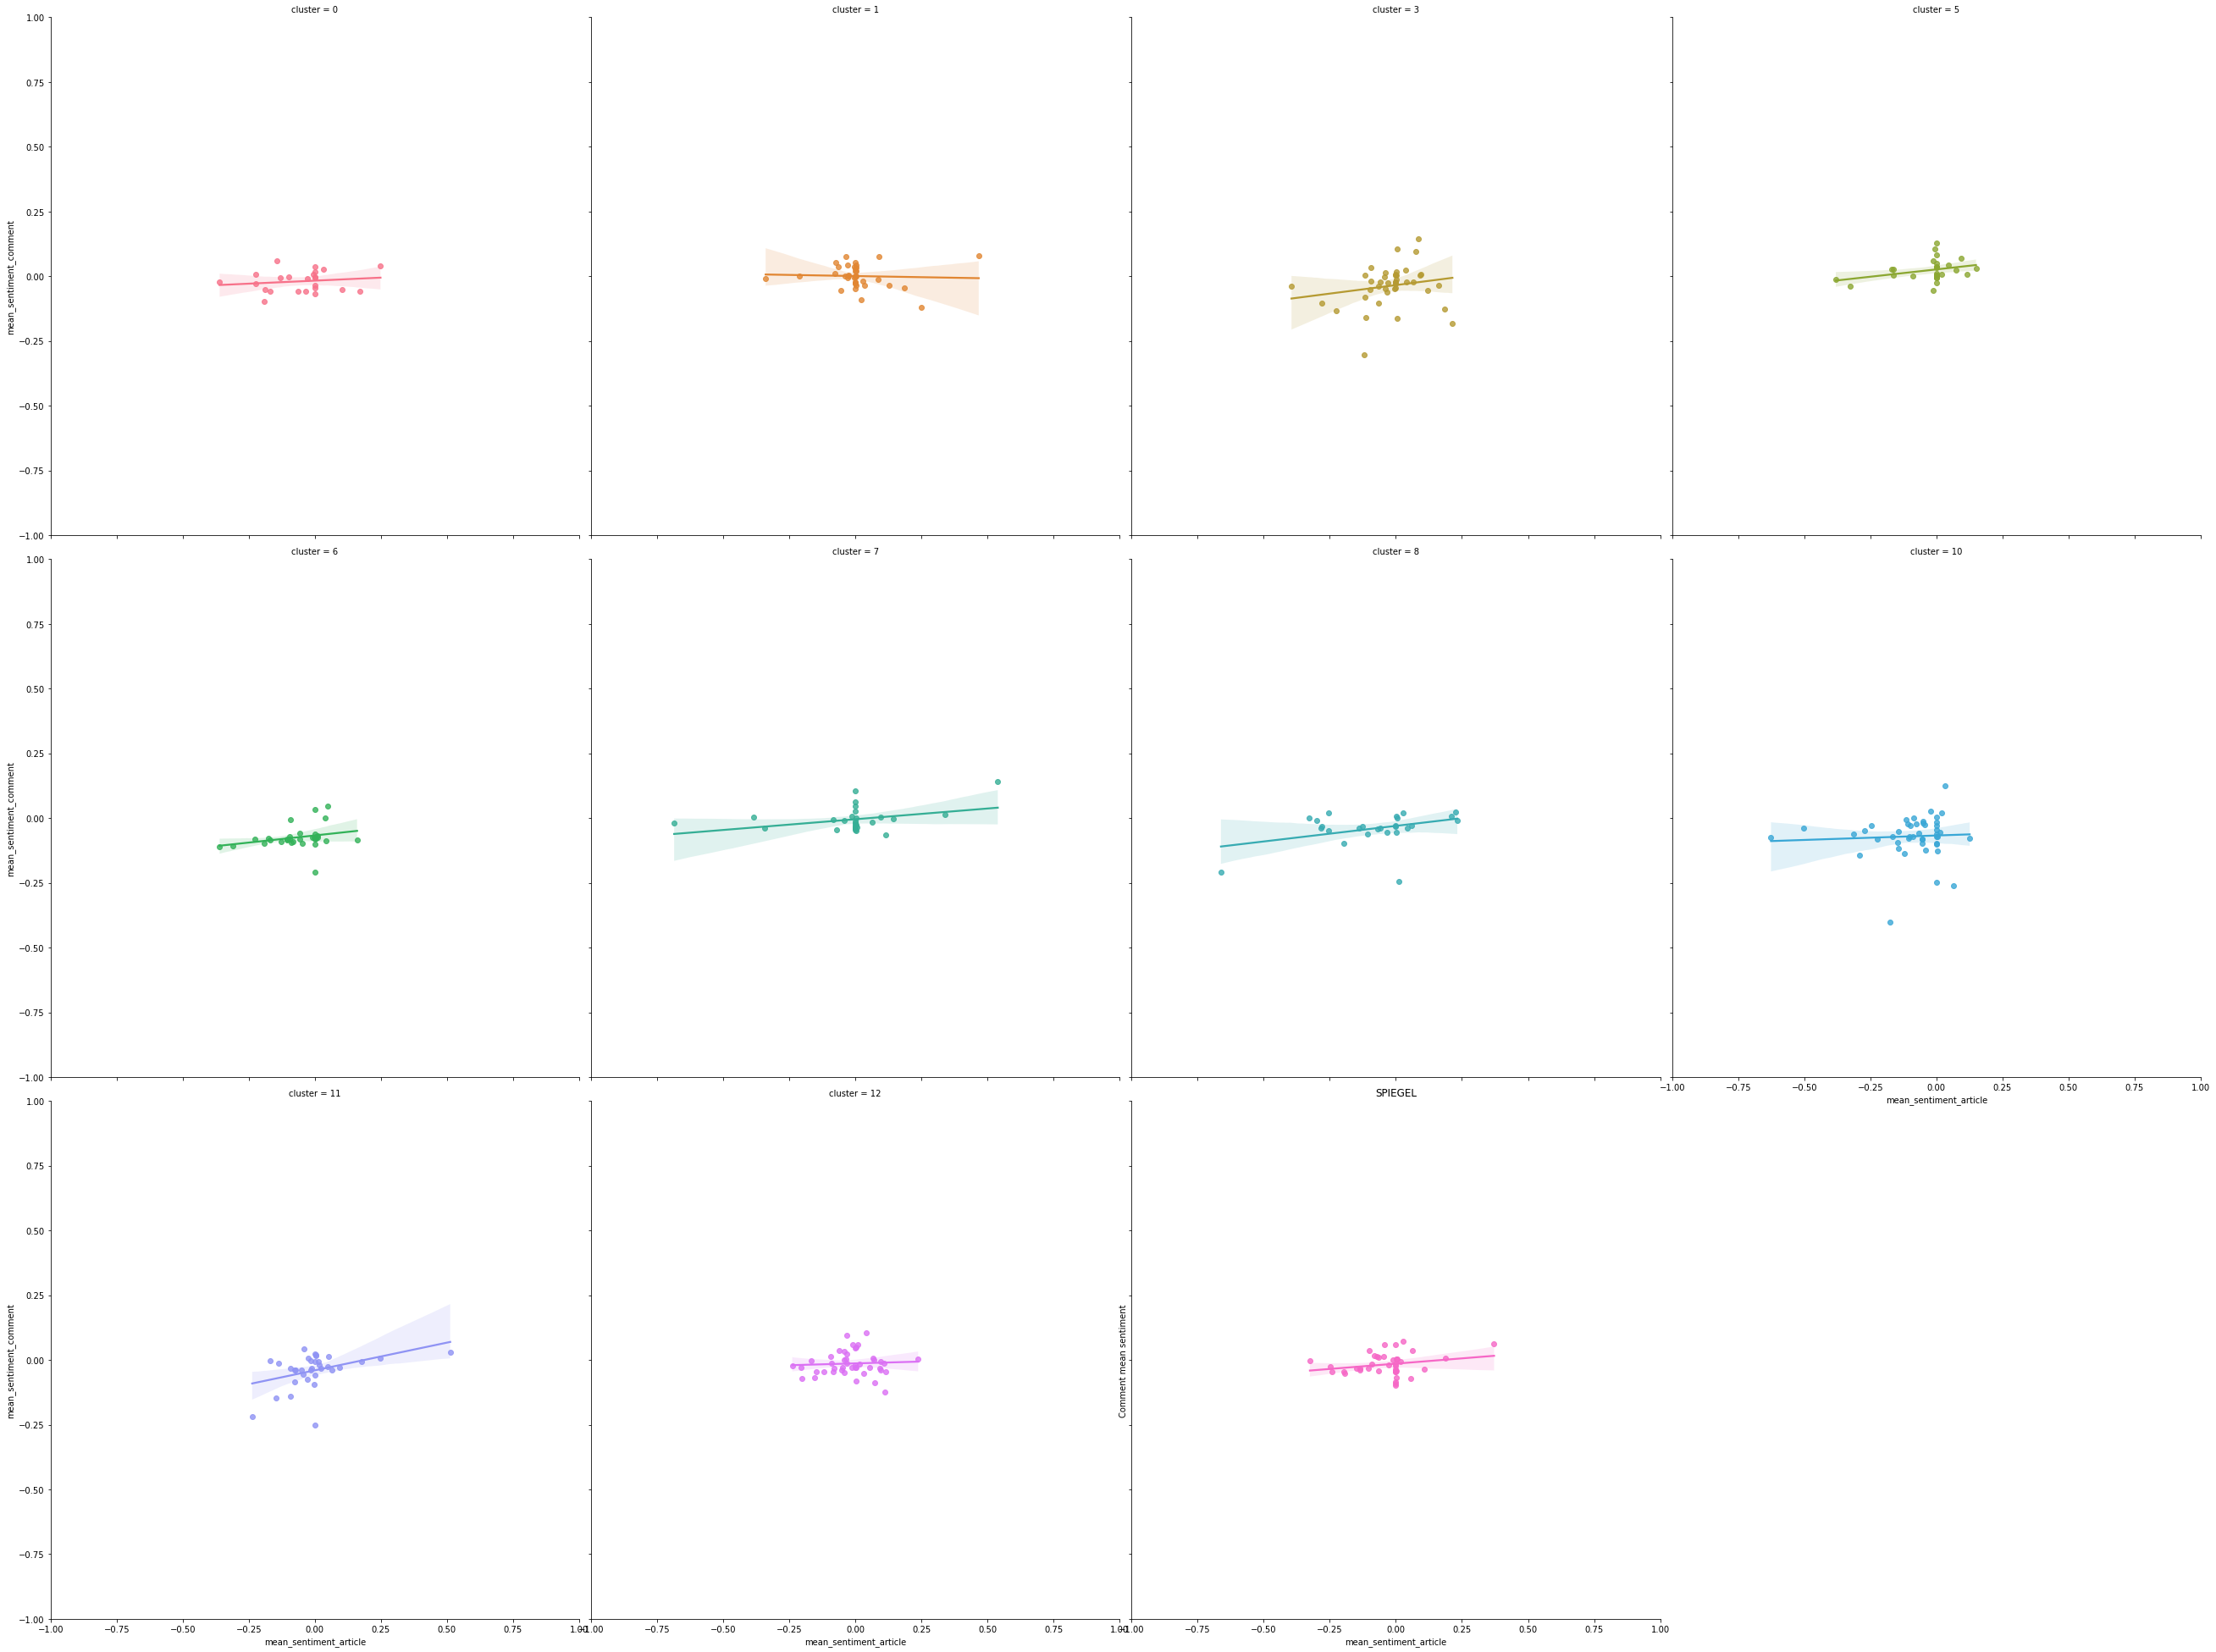

In [ ]:
def get_global_pearson_corr(source = Source.NYTIMES, is_hue = False):

  # def label_point(x, y, val, ax):
  #   a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  #   for i, point in a.iterrows():
  #     ax.text(point['x'], point['y'], str(point['val']))

  sub_article = df[(df.source == source) & (df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = df[(df.source ==  source) & (df.comment_id != DocType.NON_COMMENT.value)]
  sub_article.head()

  unique_doc_ids = sub_article.article_id.unique()
  unique_doc_ids2 = sub_comment.article_id.unique()
  print('Total of unique doc_id from article {}'.format(len(unique_doc_ids)))
  # print(unique_doc_ids)
  print('Total of unique doc_id from comment {}'.format(len(unique_doc_ids2)))
  # print(unique_doc_ids2)

  if is_hue:
    article_mean_sentiment_df = pd.DataFrame({'mean_sentiment': sub_article.groupby(['article_id', 'cluster'])['sentiw_sentiment'].mean()}).reset_index()
    comment_mean_sentiment_df = pd.DataFrame({'mean_sentiment': sub_comment.groupby(['article_id', 'cluster'])['sentiw_sentiment'].mean()}).reset_index()

    merged_mean_sentiment_df = article_mean_sentiment_df.merge(comment_mean_sentiment_df, how = 'outer', on = ['article_id', 'cluster'], validate = '1:1', suffixes=('_article', '_comment'))
  else:
    article_mean_sentiment_df = pd.DataFrame({'mean_sentiment': sub_article.groupby(['article_id'])['sentiw_sentiment'].mean()}).reset_index()
    comment_mean_sentiment_df = pd.DataFrame({'mean_sentiment': sub_comment.groupby(['article_id'])['sentiw_sentiment'].mean()}).reset_index()

    merged_mean_sentiment_df = article_mean_sentiment_df.merge(comment_mean_sentiment_df, how = 'outer', on = ['article_id'], validate = '1:1', suffixes=('_article', '_comment'))
  # merged_mean_sentiment_df

    print(merged_mean_sentiment_df)

    util.print_stat(merged_mean_sentiment_df.mean_sentiment_article, merged_mean_sentiment_df.mean_sentiment_comment)


  
  if is_hue:
    g = sns.lmplot(x = 'mean_sentiment_article', y = 'mean_sentiment_comment', data = merged_mean_sentiment_df, hue = 'cluster', col= 'cluster', col_wrap = 4, height = 9)

    pearson_result = pd.DataFrame(columns = ['topic_index', 'topic', 'r', 'p_value'])
    for i in range(OptimalKClustersConfig.k_with_garbage):
      if i not in OptimalKClustersConfig.garbage_clusters:
        # print(i, OptimalKClustersConfig.clusters_with_garbage[i])
        clustered_merged_mean_sentiment_df = merged_mean_sentiment_df[merged_mean_sentiment_df.cluster == i]
        x = clustered_merged_mean_sentiment_df.mean_sentiment_article
        y = clustered_merged_mean_sentiment_df.mean_sentiment_comment
        nas = np.logical_or(np.isnan(x), np.isnan(y))
        if len(x[~nas]) < 2 or len(y[~nas]) < 2:
          continue
          pearson_result.append()
        else:
          r, p_val = pearsonr(x[~nas], y[~nas])

          if (p_val < 0.05):
            cprint('Topic {}: {}'.format(i, OptimalKClustersConfig.clusters_with_garbage[i]), 'blue')
            cprint('Pearsons correlation: {:.4f} (p-value: {:.4f}) with {} point '.format(r, p_val, len(nas[~nas])), 'blue')
          else:
            print('Topic {}: {}'.format(i, OptimalKClustersConfig.clusters_with_garbage[i]))
            print('Pearsons correlation: {:.4f} (p-value: {:.4f}) with {} point '.format(r, p_val, len(nas[~nas])))
            
  else:
    x = merged_mean_sentiment_df.mean_sentiment_article
    y = merged_mean_sentiment_df.mean_sentiment_comment

    # calculate Pearson's correlation
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    r, p_val = pearsonr(x[~nas], y[~nas])
    # r, _ = pearsonr(x, y)
    if (p_val < 0.05):
      cprint('Overall:', 'blue')
      cprint('Pearsons correlation: {:.4f} (p-value: {:.4f}) with {} point '.format(r, p_val, len(nas[~nas])), 'blue')
    else:
      print('Overall:')
      print('Pearsons correlation: {:.4f} (p-value: {:.4f}) with {} point '.format(r, p_val, len(nas[~nas])))
    
    g = sns.lmplot(x = 'mean_sentiment_article', y = 'mean_sentiment_comment', data = merged_mean_sentiment_df, height = 9)
  # label_point(x, y, merged_mean_sentiment_df.doc_id, plt.gca())
  # fig, ax = plt.subplots(figsize = (11, 9))
  # ax.scatter(x = x, y = y)
  # for i, txt in enumerate(merged_mean_sentiment_df.doc_id):
  #   ax.annotate(txt, (x[i], y[i]))
  # plt.xlim(-1, 1)
  # plt.ylim(-1, 1)
  # sns.set(xlim = (-0.2, 0.2))
  g.set(xlim = (-1, 1), ylim = (-1, 1))


  plt.ylabel('Comment mean sentiment')
  plt.title(str.upper(source))
  plt.show()

print(str.upper(Source.NYTIMES))
get_global_pearson_corr(source = Source.NYTIMES)
get_global_pearson_corr(source = Source.NYTIMES, is_hue = True)
print()
print()
print(str.upper(Source.QUORA))
get_global_pearson_corr(source = Source.QUORA)
get_global_pearson_corr(source = Source.QUORA, is_hue = True)
print()
print()
print(str.upper(Source.SPIEGEL))
get_global_pearson_corr(source = Source.SPIEGEL)
get_global_pearson_corr(source = Source.SPIEGEL, is_hue = True)


In [ ]:
# pprint.pprint(article_mean_sentiment_df.doc_id.unique())
# print(len(article_mean_sentiment_df.doc_id.unique()))
# pprint.pprint(comment_mean_sentiment_df.doc_id.unique())
# print(len(comment_mean_sentiment_df.doc_id.unique()))
# print(len(sub_article.doc_id.unique()))
# len(list(set(list(article_mean_sentiment_df.doc_id.unique()) + list(comment_mean_sentiment_df.doc_id.unique()))))

In [ ]:
# Convert assignments into panda dataframe
df = pd.DataFrame.from_dict(assignments)
df['date_str'] = df['date']
df['month'] = df['date'].str[:-3]
df['year'] = df['date'].str[:4]
df['date'] = pd.to_datetime(df['date'])

print()

# Filter out unnecessary the assignment records
# 1. Records from garbage clusters
# 2. Records not falls between 2009 and 2017
# pprint.pprint(pd.unique(df['cluster']))
df = df[~df['cluster'].isin(OptimalKClustersConfig.garbage_clusters)]
print('Unique cluster after filtering:')
pprint.pprint(pd.unique(df['cluster']))

source = Source.NYTIMES

sub_article = df[(df.cluster == 0) & (df.source == source) & (df.comment_id == DocType.NON_COMMENT.value)]
sub_comment = df[(df.cluster == 0) & (df.source ==  source) & (df.comment_id != DocType.NON_COMMENT.value)]

article_mean_sentiment_df = pd.DataFrame({'mean_sentiment': sub_article.groupby(['doc_id', 'cluster'])['sentiment'].mean()}).reset_index()
article_sentence_count_article_cluster_wise_df = pd.DataFrame({'sentence_count_article_cluster_wise': sub_article.groupby(['doc_id', 'cluster'])['global_id'].count()}).reset_index()
article_sentence_count_cluster_wise_df = pd.DataFrame({'sentence_count_cluster_wise': sub_article.groupby(['cluster'])['global_id'].count()}).reset_index()

merged_article = article_mean_sentiment_df.merge(article_sentence_count_article_cluster_wise_df, how = 'left', on = ['doc_id', 'cluster'], validate = '1:1').merge(article_sentence_count_cluster_wise_df, how = 'left', on = ['cluster'], validate = 'm:1')
# display(article_mean_sentiment_df.head())
# display(article_sentence_count_article_cluster_wise_df.head())
# display(article_sentence_count_cluster_wise_df.head())
display(merged_article.head())

comment_mean_sentiment_df = pd.DataFrame({'mean_sentiment': sub_comment.groupby(['doc_id', 'cluster'])['sentiment'].mean()}).reset_index()
# pprint.pprint(article_mean_sentiment_df.doc_id.unique())
# pprint.pprint(comment_mean_sentiment_df.doc_id.unique())

merged_mean_sentiment_df = article_mean_sentiment_df.merge(comment_mean_sentiment_df, how = 'outer', on = ['doc_id', 'cluster'], validate = '1:1', suffixes=('_article', '_comment'))
merged_mean_sentiment_df.head(10)


Unique cluster after filtering:
array([ 1,  3, 10, 12,  6, 13,  8, 11,  0,  5,  7])


,doc_id,cluster,mean_sentiment,sentence_count_article_cluster_wise,sentence_count_cluster_wise
0,1,0,-0.097868,9,960
1,3,0,0.078656,7,960
2,5,0,0.000000,3,960
3,7,0,0.148611,3,960
4,8,0,0.208333,1,960


,doc_id,cluster,mean_sentiment_article,mean_sentiment_comment
0,1,0,-0.097868,NaN
1,3,0,0.078656,0.017515
2,5,0,0.000000,NaN
3,7,0,0.148611,NaN
4,8,0,0.208333,NaN
5,11,0,0.010417,NaN
6,13,0,-0.100000,NaN
7,14,0,-0.112847,NaN
8,16,0,0.051711,-0.038054
9,18,0,-0.018027,NaN


## 2. relationship: AX and CY  sentinemt + cross-lag (probably 2 weeks) overall

 cross-lagged correlation with Pearson correlation

* 2009-2017 with time windows of two weeks, w = 1, ..., W in which W is the total number of windows

```
PX1Y2 
          w           w+1
t=1, w=1  A_{w,t}    C_{w+1,t}
t=1, w=2  
...
t=2, w=2
..
t=T, w=W
```

Handle NaN
1. row with either (or both) column as NaN, ignore **
2. Imputation https://en.wikipedia.org/wiki/Imputation_(statistics), (SHAP important feature determination)



In [ ]:
def get_pearson_correlation(x, y, title, lagged_df):
  # remove rows with any NaN, since cross-lagged correlation considers any arbitrary pair of A_x and C_y, does it make sense??
  nas = np.logical_or(np.isnan(x), np.isnan(y))
  if len(x[~nas]) <= 2 or len(y[~nas]) <= 2:
      cprint('Warn: Pearson correlation cannot be calculated with just a pair of data.', 'red')
      return np.nan, np.nan, np.nan
  r, p_val = pearsonr(x[~nas], y[~nas])

  # if (p_val < 0.05):
  #   cprint(title + ':', 'blue')
  #   cprint('Pearsons correlation: {:.4f} (p-value: {:.4f}) with {} pairs '.format(r, p_val, len(nas[~nas])), 'blue')
  # else:
  #   print(title + ':')
  #   print('Pearsons correlation: {:.4f} (p-value: {:.4f}) with {} pairs '.format(r, p_val, len(nas[~nas])))
  # display(lagged_df[~nas])

  valid_pairs = len(nas[~nas])
  return r, p_val, valid_pairs

def cal(source, cause_stat, effect_stat, cause_effect = '', topic = ''):
  lagged_df = pd.DataFrame({'cause_index_14D': cause_stat.index_14D[:-1],
                'cause_sentiment_mean': cause_stat.sentiment_mean[:-1],
                'cause_sentiment_median': cause_stat.sentiment_median[:-1],
                'cause_hotness': cause_stat.hotness[:-1],
                'cause_sentence_count': cause_stat.sentiment_count[:-1],
                'effect_index_14D': effect_stat.index_14D.shift(-1),
                'effect_sentiment_mean': effect_stat.sentiment_mean.shift(-1),
                'effect_sentiment_median': effect_stat.sentiment_median.shift(-1), 
                'effect_hotness': effect_stat.hotness.shift(-1),
                'effect_sentence_count': effect_stat.sentiment_count.shift(-1)})
  # print('Source:', str.upper(source))
  r_for_mean, p_val_for_mean, valid_pairs_for_mean = get_pearson_correlation(lagged_df.cause_sentiment_mean, lagged_df.effect_sentiment_mean, 'Article_{w}, Comment_{w+1}, sentiment mean', lagged_df)
  r_for_median, p_val_for_median, valid_pairs_for_median = get_pearson_correlation(lagged_df.cause_sentiment_median, lagged_df.effect_sentiment_median, 'Article_{w}, Comment_{w+1}, sentiment median', lagged_df)
  r_for_hotness, p_val_for_hotness, valid_pairs_for_hotness = get_pearson_correlation(lagged_df.cause_hotness, lagged_df.effect_hotness, 'Article_{w}, Comment_{w+1}, hotness', lagged_df)
  r_for_count, p_val_for_count, valid_pairs_for_count = get_pearson_correlation(lagged_df.cause_sentence_count, lagged_df.effect_sentence_count, 'Comment_{w}, Comment_{w+1}, sentence count', lagged_df)
  # print('Total number of biweekly interval:', lagged_df.shape[0])
  total_pairs = lagged_df.shape[0]
  return [source, total_pairs, topic, cause_effect,
          r_for_mean, p_val_for_mean, valid_pairs_for_mean, # / lagged_df.shape[0] * 100, 
          r_for_median, p_val_for_median, valid_pairs_for_median, # / lagged_df.shape[0] * 100, 
          r_for_hotness, p_val_for_hotness, valid_pairs_for_hotness, # / lagged_df.shape[0] * 100, 
          r_for_count, p_val_for_count, valid_pairs_for_count] #/ lagged_df.shape[0] * 100]

def get_cross_lagged_correlation(source):
  sub_article = biweekly_df[(biweekly_df.source == source) & (biweekly_df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = biweekly_df[(biweekly_df.source ==  source) & (biweekly_df.comment_id != DocType.NON_COMMENT.value)]

  full_index_14D_df = pd.DataFrame({'index_14D': range(0, interval_list.size)})

  sub_article_stat = get_biweekly_stat(sub_article, interval_list)
  sub_comment_stat = get_biweekly_stat(sub_comment, interval_list)

  sub_article_stat = full_index_14D_df.merge(sub_article_stat, on = 'index_14D', how = 'left')
  sub_comment_stat = full_index_14D_df.merge(sub_comment_stat, on = 'index_14D', how = 'left')

  result = []
  
  
  result.append(cal(source, sub_article_stat, sub_comment_stat, cause_effect = 'A1C2', topic = 'overall'))
  result.append(cal(source, sub_comment_stat, sub_article_stat, cause_effect = 'C1A2', topic = 'overall'))
  result.append(cal(source, sub_article_stat, sub_article_stat, cause_effect = 'A1A2', topic = 'overall'))
  result.append(cal(source, sub_comment_stat, sub_comment_stat, cause_effect = 'C1C2', topic = 'overall'))

  df = pd.DataFrame(data = result, columns = ['source', 'total pairs', 'topic', 'cause & effect', 
                                          'r (mean)', 'p_val (mean)', 'valid pairs(mean)',
                                          'r (median)', 'p_val (median)', 'valid pairs(median)',
                                          'r (hotness)', 'p_val (hotness)', 'valid pairs(hotness)',
                                          'r (count)', 'p_val (count)', 'valid pairs(count)'])
  
  return df

def color_significant_value_red(val, p_val = 0.05):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if type(val) == float and val <= p_val else 'black'
    return 'color: %s' % color

cross_lagged_corr_df = get_cross_lagged_correlation(source = Source.NYTIMES)
cross_lagged_corr_df = cross_lagged_corr_df.append(get_cross_lagged_correlation(source = Source.QUORA))
cross_lagged_corr_df = cross_lagged_corr_df.append(get_cross_lagged_correlation(source = Source.SPIEGEL)) # warning for contant input array since the sentiemnt median for die Spiegel always equal to 0.
cross_lagged_corr_df.reset_index().style.applymap(color_significant_value_red)

,index,source,total pairs,topic,cause & effect,r (mean),p_val (mean),valid pairs(mean),r (median),p_val (median),valid pairs(median),r (hotness),p_val (hotness),valid pairs(hotness),r (count),p_val (count),valid pairs(count)
0,0,nytimes,234,overall,A1C2,-0.163753,0.172395,71,-0.072526,0.547798,71,0.314946,0.007470,71,0.304318,0.009874,71
1,1,nytimes,234,overall,C1A2,-0.016677,0.899358,60,-0.089670,0.495654,60,0.266298,0.039720,60,0.268723,0.037886,60
2,2,nytimes,234,overall,A1A2,0.024765,0.856235,56,-0.042602,0.755228,56,0.095630,0.483242,56,0.098538,0.469975,56
3,3,nytimes,234,overall,C1C2,-0.044576,0.704135,75,-0.076501,0.514177,75,0.404468,0.000319,75,0.392453,0.000497,75
4,0,quora,234,overall,A1C2,0.039113,0.626714,157,0.055990,0.486118,157,0.185590,0.019959,157,0.162491,0.042025,157
5,1,quora,234,overall,C1A2,0.108913,0.183126,151,0.064791,0.429308,151,0.220084,0.006621,151,0.226302,0.005205,151
6,2,quora,234,overall,A1A2,0.121191,0.163049,134,0.095416,0.272785,134,0.037596,0.666267,134,-0.031321,0.719399,134
7,3,quora,234,overall,C1C2,0.069799,0.351818,180,-0.011477,0.878473,180,0.804830,0.000000,180,0.807260,0.000000,180
8,0,spiegel,234,overall,A1C2,0.276698,0.083912,40,-0.032230,0.843492,40,0.198483,0.219533,40,0.061833,0.704665,40
9,1,spiegel,234,overall,C1A2,0.172512,0.370852,29,0.011356,0.953379,29,-0.090183,0.641760,29,0.086742,0.654575,29


## 2. relationship: AX and CY  sentinemt + cross-lag (probably 2 weeks) by topic

In [ ]:
def get_cross_lagged_correlation_by_topic(source):

  sub_article = biweekly_df[(biweekly_df.source == source) & (biweekly_df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = biweekly_df[(biweekly_df.source ==  source) & (biweekly_df.comment_id != DocType.NON_COMMENT.value)]

  full_index_14D_df = pd.DataFrame({'index_14D': range(0, interval_list.size)})

  sub_article_stat = get_biweekly_stat_per_topic(sub_article, interval_list)
  sub_comment_stat = get_biweekly_stat_per_topic(sub_comment, interval_list)

  # print('Source:', str.upper(source))

  result = []

  for i in range(OptimalKClustersConfig.k_with_garbage):
  # # for i in [10]:
    if i in OptimalKClustersConfig.garbage_clusters:
      continue
    # for j in range(OptimalKClustersConfig.k_with_garbage):
    #   if j in OptimalKClustersConfig.garbage_clusters:
    #     continue
      # print()
      # print('Topic {} vs {}: {} vs {}'.format(i, j, OptimalKClustersConfig.clusters_with_garbage[i], OptimalKClustersConfig.clusters_with_garbage[j]))
    sub_article_stat_per_topic = sub_article_stat[sub_article_stat.cluster == i]
    sub_comment_stat_per_topic = sub_comment_stat[sub_comment_stat.cluster == i]

    sub_article_stat_per_topic = full_index_14D_df.merge(sub_article_stat_per_topic, on = 'index_14D', how = 'left')
    sub_comment_stat_per_topic = full_index_14D_df.merge(sub_comment_stat_per_topic, on = 'index_14D', how = 'left')


    result.append(cal(source, sub_article_stat_per_topic, sub_comment_stat_per_topic, cause_effect = 'A1C2', topic = OptimalKClustersConfig.clusters_with_garbage[i])) #.append(OptimalKClustersConfig.clusters_with_garbage[i]).append(OptimalKClustersConfig.clusters_with_garbage[j]))
    result.append(cal(source, sub_comment_stat_per_topic, sub_article_stat_per_topic, cause_effect = 'C1A2', topic = OptimalKClustersConfig.clusters_with_garbage[i])) #.append(OptimalKClustersConfig.clusters_with_garbage[i]).append(OptimalKClustersConfig.clusters_with_garbage[j]))
    result.append(cal(source, sub_article_stat_per_topic, sub_article_stat_per_topic, cause_effect = 'A1A2', topic = OptimalKClustersConfig.clusters_with_garbage[i])) #.append(OptimalKClustersConfig.clusters_with_garbage[i]).append(OptimalKClustersConfig.clusters_with_garbage[j]))
    result.append(cal(source, sub_comment_stat_per_topic, sub_comment_stat_per_topic, cause_effect = 'C1C2', topic = OptimalKClustersConfig.clusters_with_garbage[i])) #.append(OptimalKClustersConfig.clusters_with_garbage[i]).append(OptimalKClustersConfig.clusters_with_garbage[j]))

  df = pd.DataFrame(data = result, columns = ['source', 'total pairs', 'topic', 'cause & effect', 
                                              'r (mean)', 'p_val (mean)', 'valid pairs(mean)',
                                              'r (median)', 'p_val (median)', 'valid pairs(median)',
                                              'r (hotness)', 'p_val (hotness)', 'valid pairs(hotness)',
                                              'r (count)', 'p_val (count)', 'valid pairs(count)'])
  return df
  
cross_lagged_corr_df = get_cross_lagged_correlation_by_topic(source = Source.NYTIMES)
cross_lagged_corr_df = cross_lagged_corr_df.append(get_cross_lagged_correlation_by_topic(source = Source.QUORA))
cross_lagged_corr_df = cross_lagged_corr_df.append(get_cross_lagged_correlation_by_topic(source = Source.SPIEGEL))
cross_lagged_corr_df.reset_index().style.applymap(color_significant_value_red)



/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.
Warn: Pearson correlation cannot be calculated with just a pair of data.


,index,source,total pairs,topic,cause & effect,r (mean),p_val (mean),valid pairs(mean),r (median),p_val (median),valid pairs(median),r (hotness),p_val (hotness),valid pairs(hotness),r (count),p_val (count),valid pairs(count)
0,0,nytimes,234,Planting and gardening,A1C2,0.035927,0.850500,30.000000,0.107879,0.570420,30.000000,0.306841,0.099089,30.000000,0.386485,0.034886,30.000000
1,1,nytimes,234,Planting and gardening,C1A2,0.129710,0.565075,22.000000,0.194113,0.386709,22.000000,0.486960,0.021537,22.000000,0.352921,0.107168,22.000000
2,2,nytimes,234,Planting and gardening,A1A2,0.257754,0.301776,18.000000,0.323784,0.189950,18.000000,0.622190,0.005829,18.000000,0.522740,0.026028,18.000000
3,3,nytimes,234,Planting and gardening,C1C2,0.097616,0.565447,37.000000,0.157579,0.351620,37.000000,0.618685,0.000045,37.000000,0.626438,0.000034,37.000000
4,4,nytimes,234,Retail,A1C2,-0.195396,0.268101,34.000000,-0.120279,0.498042,34.000000,0.208199,0.237368,34.000000,0.086214,0.627809,34.000000
5,5,nytimes,234,Retail,C1A2,-0.064205,0.718289,34.000000,0.071514,0.687747,34.000000,0.026954,0.879727,34.000000,-0.063017,0.723295,34.000000
6,6,nytimes,234,Retail,A1A2,0.059320,0.702096,44.000000,0.003829,0.980318,44.000000,0.471167,0.001246,44.000000,0.230892,0.131572,44.000000
7,7,nytimes,234,Retail,C1C2,-0.230480,0.229032,29.000000,0.074456,0.701088,29.000000,-0.158040,0.412901,29.000000,-0.153461,0.426737,29.000000
8,8,nytimes,234,GMO label and bio-products,A1C2,0.269795,0.073084,45.000000,0.216205,0.153733,45.000000,0.488552,0.000662,45.000000,0.495054,0.000546,45.000000
9,9,nytimes,234,GMO label and bio-products,C1A2,-0.106643,0.529862,37.000000,-0.224630,0.181343,37.000000,0.179984,0.286443,37.000000,0.220610,0.189488,37.000000


# Reference: Distribution of sentences by date

Due to the below distribution, tests on New York Times and Der Spiegel are ranging from 2007 to 2017 while tests related to Quora is in the period between 2009 and 2017.

In [ ]:
def get_sentence_distribution_by_date(source = Source.NYTIMES):
  sub_doc = df[(df.source == source) & (df.comment_id == DocType.NON_COMMENT.value)]
  sub_comment = df[(df.source ==  source) & (df.comment_id != DocType.NON_COMMENT.value)]

  print('Unqiue year for', source, 'articles sentences:', sorted(sub_doc.year.unique()))
  print('Unqiue year for', source, 'comments sentences:', sorted(sub_comment.year.unique()))

  title = 'Distribution of sentences by date for ' + source
  plt.hist(sub_doc.date.astype('datetime64').values, alpha = 0.5, label = 'Article')
  plt.hist(sub_comment.date.astype('datetime64').values, alpha = 0.5, label = 'Comment')
  plt.ylim(0, 70000)
  plt.title(title)
  plt.legend()

  plt.show()

get_sentence_distribution_by_date(source = Source.NYTIMES)
get_sentence_distribution_by_date(source = Source.QUORA)
get_sentence_distribution_by_date(source = Source.SPEIGEL)

# Reference: Store dataframe with biweekly aggregation

In [ ]:
%time biweekly_df, interval_list = get_df_with_time_interval_indexing(df, start_year, end_year, interval = '14D', column_name = '_14_day_index')

file_name = 'df_' + str(start_year) + '_to_' + str(end_year) + '__14D_indexed.csv'
biweekly_df.to_csv(file_name)
print('Completed!')

CPU times: user 17min 16s, sys: 172 ms, total: 17min 16s
Wall time: 17min 17s
Completed!


In [ ]:
%time df_new, _ = get_df_with_time_interval_indexing(df, start_year, end_year, interval = '2D', column_name = '_2_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '3D', column_name = '_3_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '4D', column_name = '_4_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '5D', column_name = '_5_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '6D', column_name = '_6_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '7D', column_name = '_7_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '14D', column_name = '_14_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '28D', column_name = '_28_day_index')
%time df_new, _ = get_df_with_time_interval_indexing(df_new, start_year, end_year, interval = '56D', column_name = '_56_day_index')
print('Completed!')

In [ ]:
file_name = 'df_' + str(start_year) + '_to_' + str(end_year) + '_with_time_interval_indexing.csv'
df_new.to_csv(file_name)

In [ ]:
i = 194
print(interval_list[i])
pd.unique(df_new[df_new._14D_index == i].date)

In [ ]:
interval_list

In [ ]:
df['date'].max()

In [ ]:
print(start_datetime in interval_list[0])